# **Gradient Descent Algorithm Tasks**

# **Question 1: Salary Prediction with Gradient Descent**

***In question 1 the goal was to predict salary based on years of experience, implement gradient descent to find the best-fit line, visualize how positive and negative adjustments affect convergence, and analyze the results. I’ll walk you through my process step-by-step, including what I did, the challenges I ran into, and how I figured things out.***

# **Loading Dataset and Importing Libraries**

***Importing necessary Libraries***

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import time
import os
from sklearn.preprocessing import MinMaxScaler, StandardScaler


***Loading dataset from CSV to pandas dataframe***

In [4]:
# loading dataset
df = pd.read_csv('Salary_data.csv')

# checking columns
df.columns


Index(['Unnamed: 0', 'YearsExperience', 'Salary'], dtype='object')

***Extracting Features and Target***

In [5]:
X = df['YearsExperience'].values  # Years of experience
y = df['Salary'].values  # Salaries


# **Data Visualization and Preprocessing**

***Plot Scatter Function***

In [6]:
def plot_scatter(X, y, title="Scatter Plot", xlabel="X", ylabel="Y", color='blue', marker='o'):
    plt.figure(figsize=(8, 6))
    plt.scatter(X, y, color=color, marker=marker)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.show()

***Scatter Graph (Original Data)***

*A simple scatter plot shows how salary increases with more experience.*




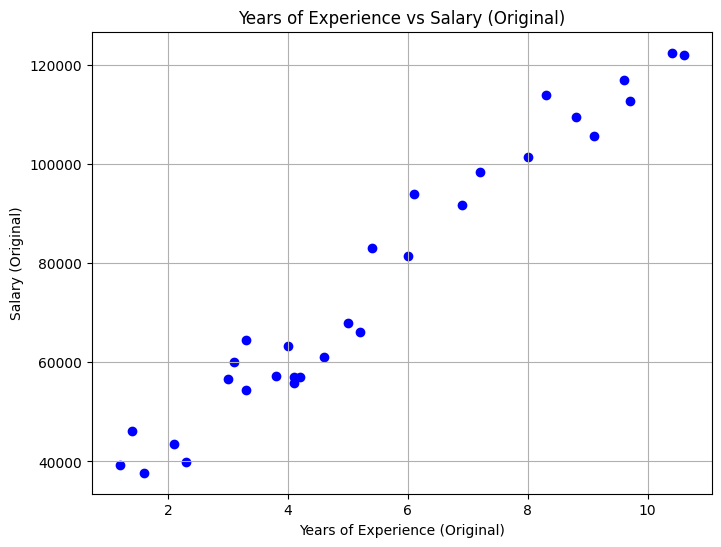

In [7]:
# Plot original data
plot_scatter(X, y,
             title="Years of Experience vs Salary (Original)",
             xlabel="Years of Experience (Original)",
             ylabel="Salary (Original)",
             color='blue')

***Normalization***

*Scaled all X and y values between 0 and 1 so gradient descent works better and faster.*

In [8]:
# Extract features and target
X = df['YearsExperience'].values.reshape(-1, 1)  # Reshape for sklearn
y = df['Salary'].values.reshape(-1, 1)

# Normalization (scaling to [0,1])
normalizer = MinMaxScaler()
X_normalized = normalizer.fit_transform(X)
y_normalized = normalizer.fit_transform(y)

print("Original X (first 5):", X[:5].flatten())
print("Normalized X (first 5):", X_normalized[:5].flatten())

Original X (first 5): [1.2 1.4 1.6 2.1 2.3]
Normalized X (first 5): [0.         0.0212766  0.04255319 0.09574468 0.11702128]


***Standardization***

*This scales X and y to have mean = 0 and standard deviation = 1. Good when data has outliers.*

In [9]:
# Standardization (zero mean, unit variance)
standardizer = StandardScaler()
X_standardized = standardizer.fit_transform(X)
y_standardized = standardizer.fit_transform(y)

print("Original X (first 5):", X[:5].flatten())
print("Standardized X (first 5):", X_standardized[:5].flatten())

Original X (first 5): [1.2 1.4 1.6 2.1 2.3]
Standardized X (first 5): [-1.51005294 -1.43837321 -1.36669348 -1.18749416 -1.11581443]


***Plotting Normalized Data***

*Just showing visually how the data looks after scaling. Important to verify scaling works properly.*

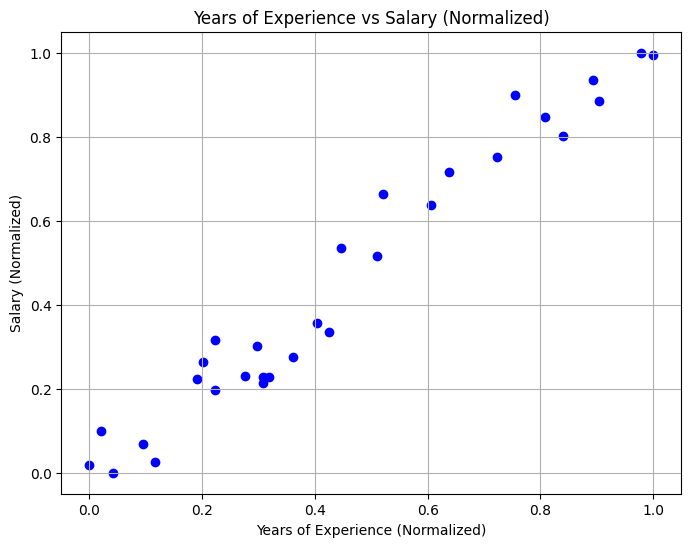

In [10]:
# Plot normalized data
plot_scatter(X_normalized.flatten(), y_normalized.flatten(),
             title="Years of Experience vs Salary (Normalized)",
             xlabel="Years of Experience (Normalized)",
             ylabel="Salary (Normalized)",
             color='blue')


***Plotting Standardized Data***

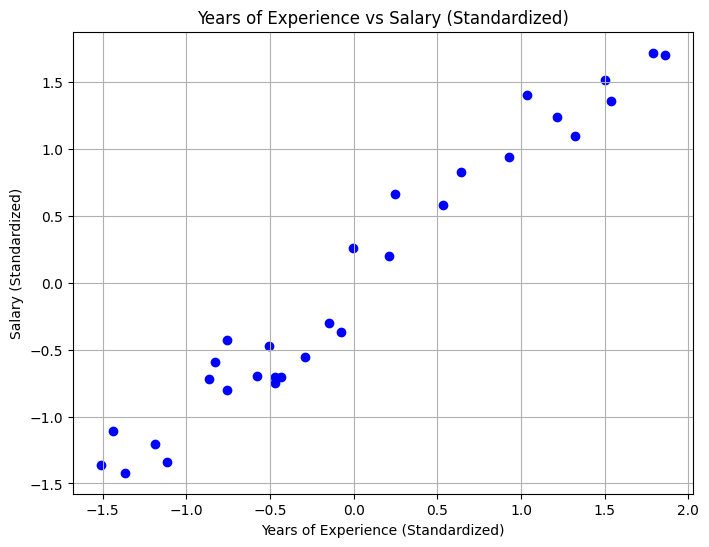

In [11]:
# Plot standardized data
plot_scatter(X_standardized.flatten(), y_standardized.flatten(),
             title="Years of Experience vs Salary (Standardized)",
             xlabel="Years of Experience (Standardized)",
             ylabel="Salary (Standardized)",
             color='blue')

# **Gradient Descent Basics**

*Gradient Descent is an optimization algorithm used to minimize the cost or error in machine learning models. It works by gradually adjusting the model's parameters (like slope and intercept in linear regression) to find the values that best fit the data.*

🔹 We calculate the gradient (slope) of the cost function.

🔹 This tells us the direction and how fast the cost is increasing.

🔹 We move in the opposite direction (downhill) by subtracting the gradient, scaled by a factor called the learning rate (α).

**Mathematically:**

*The slope (β₁) and intercept (β₀) are updated like this:*

🔹 β₁ = β₁ - α * (∂Cost/∂β₁)

🔹 β₀ = β₀ - α * (∂Cost/∂β₀)

*This process repeats for many iterations until the change in cost becomes very small or we reach max iterations*


***Setting Default Values Required***

In [12]:
# learning rate
alpha = 0.01

# Initial guess (in given space)
initial_beta_1 = 0  # slope
initial_beta_0 = 0  # intercept

# margin between costs (new vs prev; for GD convergance)
tolerance = 0.0001
max_iterations = 5000
prev_cost = float('inf')


***Plotting initial guess line with scattered points (slope, intercept = 0)***

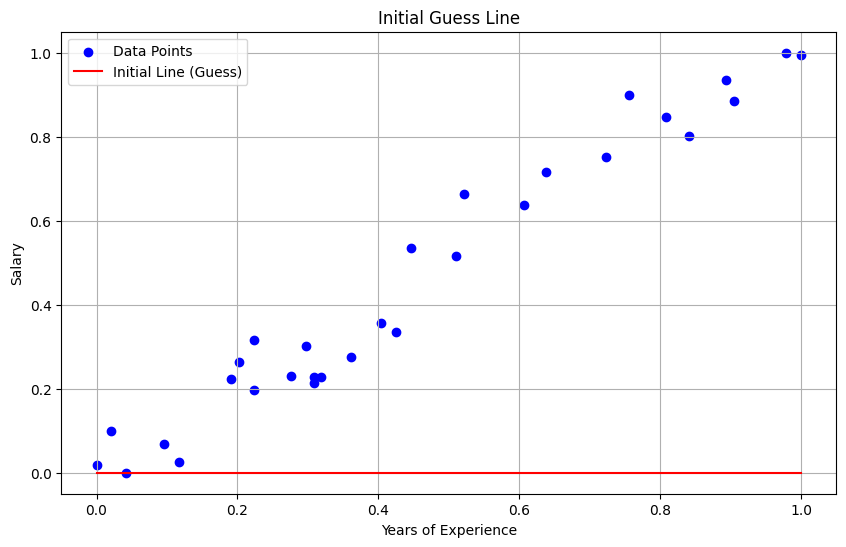

In [13]:
# Plotting data points and linear line
plt.figure(figsize=(10, 6))
plt.scatter(X_normalized.flatten(), y_normalized.flatten(), color='blue', label='Data Points')
plt.plot(X_normalized.flatten(), initial_beta_1 * X_normalized.flatten() + initial_beta_0, color='red', label='Initial Line (Guess)')

plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Initial Guess Line')
plt.legend()
plt.grid(True)
plt.show()


***Computing Initial cost***

*Calculating how bad our initial guess is using Mean Squared Error (MSE) a common cost function. Higher = worse.*

🔹 Our main goal is to minimize cost function.

In [14]:
# Compute the initial cost
m = len(X)  # Number of data points

Y_pred = initial_beta_1 * X_normalized.flatten() + initial_beta_0  # Predictions
cost = (1/(2*m)) * np.sum((Y_pred - y_normalized.flatten())**2) # MSE

print(f"Initial Cost (J) = {cost:.2f}")


Initial Cost (J) = 0.15


***Computing Gradient (Partial Derivative)***

*Calculate the gradient (i.e., slope of cost) to know in which direction we have to move the line.*

🔹 We move to opposite direction (if -ive than we move towards positive side and vice versa).

In [15]:
# Compute gradients
beta_1 = initial_beta_1
beta_0 = initial_beta_0
Y_pred = beta_1 * X_normalized.flatten() + beta_0
gradient_beta_1 = (2/m) * np.sum((Y_pred - y_normalized.flatten()) * X_normalized.flatten()) #slope
gradient_beta_0 = (2/m) * np.sum((Y_pred - y_normalized.flatten())) #intercept

print(f"Gradient for beta_1 = {gradient_beta_1:.2f}")
print(f"Gradient for beta_0 = {gradient_beta_0:.2f}")


Gradient for beta_1 = -0.59
Gradient for beta_0 = -0.90


***Updating Parameters for slope and intercept***

*updating beta_1 and beta_0 using gradient descent rule (with negative adjustment).*

In [16]:
# Updating parameters
beta_1 = initial_beta_1 - alpha * gradient_beta_1
beta_0 = initial_beta_1 - alpha * gradient_beta_0

print(f"Updated beta_1 = {beta_1:.2f}")
print(f"Updated beta_0 = {beta_0:.2f}")


Updated beta_1 = 0.01
Updated beta_0 = 0.01


***Computing new prediction and cost***

*We check how much better the model got after just one step of gradient descent.*

In [17]:
# Computing new predictions and cost
Y_pred_new = beta_1 * X_normalized.flatten() + beta_0
cost_new = (1/(2*m)) * np.sum((Y_pred_new - y_normalized.flatten())**2) # MSE cost function very commonly used

print(f"New Cost (J) = {cost_new:.2f}")


New Cost (J) = 0.15


***Plotting updated line with scattered data points (against new slope and intercept)***

*Draw the new line with updated values to see visually how close it is getting to the actual data.*

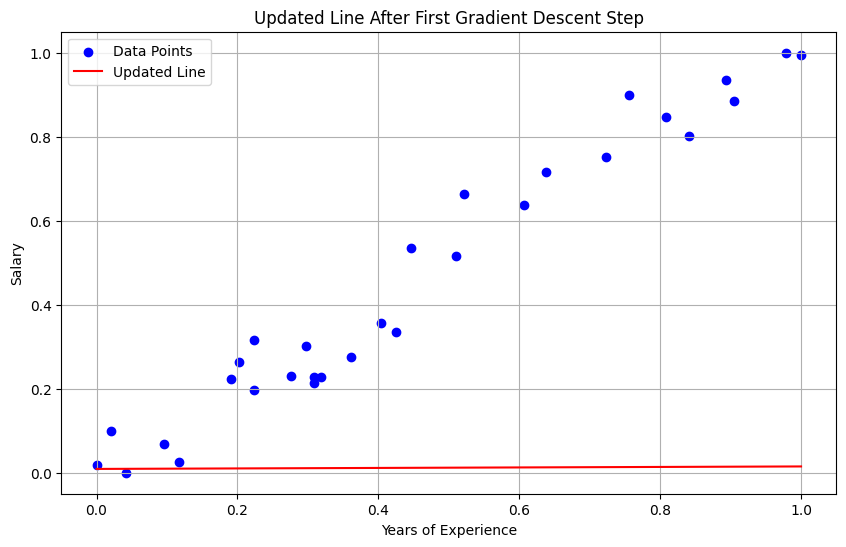

In [18]:
# Plot updated line
plt.figure(figsize=(10, 6))
plt.scatter(X_normalized.flatten(), y_normalized.flatten(), color='blue', label='Data Points')
plt.plot(X_normalized.flatten(), beta_1 * X_normalized.flatten() + beta_0, color='red', label='Updated Line')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Updated Line After First Gradient Descent Step')
plt.legend()
plt.grid(True)
plt.show()

# **Gradient Descent Algorithm**

***Algorithm***

**This function:**

🔹 Loops through many iterations

🔹 Updates parameters

🔹 Checks if cost is improving

🔹 Stops when cost stops improving (based on tolerance)

In [19]:
def gradient_descent(X, y, alpha=0.01, max_iterations=3000, tolerance=1e-6, positive_adjustment=False, verbose=True, return_full=True):
    m = len(X)
    beta_1 = 0
    beta_0 = 0
    beta_1_history = []
    beta_0_history = []
    cost_history = []
    prev_cost = float('inf')
    start_time = time.time()

    for iteration in range(max_iterations):
        Y_pred = beta_1 * X + beta_0
        gradient_beta_1 = (2/m) * np.sum((Y_pred - y) * X)
        gradient_beta_0 = (2/m) * np.sum(Y_pred - y)
        if positive_adjustment:
            beta_1 += alpha * gradient_beta_1
            beta_0 += alpha * gradient_beta_0
        else:
            beta_1 -= alpha * gradient_beta_1
            beta_0 -= alpha * gradient_beta_0

        if np.isinf(beta_1) or np.isinf(beta_0) or np.isnan(beta_1) or np.isnan(beta_0):
            if verbose:
                print(f"⚠️ Overflow detected in parameters at iteration {iteration+1} for alpha = {alpha}")
            break

        Y_pred_new = beta_1 * X + beta_0
        cost_new = (1/(2*m)) * np.sum((Y_pred_new - y)**2)

        if np.isnan(cost_new) or np.isinf(cost_new):
            if verbose:
                print(f"⚠️ NaN/Inf detected in cost at iteration {iteration+1} for alpha = {alpha}")
            break

        if return_full:
            beta_1_history.append(beta_1)
            beta_0_history.append(beta_0)
        cost_history.append(cost_new)

        if verbose:
            print(f"Iteration {iteration+1}: Cost = {cost_new:.6f}, beta_1 = {beta_1:.4f}, beta_0 = {beta_0:.4f}")

        if not positive_adjustment:
            if abs(prev_cost - cost_new) < tolerance:
                if verbose:
                    print(f"\n✅ Converged at iteration {iteration+1} with cost = {cost_new:.6f}")
                break
        prev_cost = cost_new

    end_time = time.time()

    if return_full:
        return {
            'beta_0': beta_0,
            'beta_1': beta_1,
            'beta_0_history': beta_0_history,
            'beta_1_history': beta_1_history,
            'cost_history': cost_history,
            'iterations': iteration + 1,
            'time_taken': end_time - start_time
        }
    else:
        return cost_history


***Calling GD using original data***

In [20]:
# calling GD
result = gradient_descent(X, y, alpha=0.01, max_iterations=5000, tolerance=1e-3)
cost_history_orig = result['cost_history']
beta_0_history_orig = result['beta_0_history']
beta_1_history_orig = result['beta_1_history']
beta_0_orig = result['beta_0']
beta_1_orig = result['beta_1']
iterations_orig = result['iterations']
time_taken_orig = result['time_taken']

Iteration 1: Cost = 257309737.030703, beta_1 = 9700.0883, beta_0 = 1520.0800
Iteration 2: Cost = 81062156.086370, beta_1 = 12040.2064, beta_0 = 1959.5622
Iteration 3: Cost = 70292500.301936, beta_1 = 12596.8748, beta_0 = 2136.8979
Iteration 4: Cost = 69243256.108534, beta_1 = 12721.4145, beta_0 = 2250.4183
Iteration 5: Cost = 68768219.789286, beta_1 = 12741.2818, beta_0 = 2348.1848
Iteration 6: Cost = 68330292.678192, beta_1 = 12735.8270, beta_0 = 2441.8450
Iteration 7: Cost = 67897908.196714, beta_1 = 12724.2782, beta_0 = 2534.2226
Iteration 8: Cost = 67469185.144562, beta_1 = 12711.2947, beta_0 = 2626.0029
Iteration 9: Cost = 67043985.691156, beta_1 = 12698.0055, beta_0 = 2717.3534
Iteration 10: Cost = 66622274.602124, beta_1 = 12684.6838, beta_0 = 2808.3156
Iteration 11: Cost = 66204022.890242, beta_1 = 12671.3958, beta_0 = 2898.9008
Iteration 12: Cost = 65789202.155939, beta_1 = 12658.1573, beta_0 = 2989.1130
Iteration 13: Cost = 65377784.253154, beta_1 = 12644.9719, beta_0 = 3078.

***Calling GD using normalized data***

In [21]:
# calling GD
result = gradient_descent(X_normalized.flatten(), y_normalized.flatten(), alpha=0.01, max_iterations=5000, tolerance=1e-3)
cost_history_norm = result['cost_history']
beta_0_history_norm = result['beta_0_history']
beta_1_history_norm = result['beta_1_history']
beta_0_norm = result['beta_0']
beta_1_norm = result['beta_1']
iterations_norm = result['iterations']
time_taken_norm = result['time_taken']

Iteration 1: Cost = 0.147105, beta_1 = 0.0059, beta_0 = 0.0090
Iteration 2: Cost = 0.141619, beta_1 = 0.0117, beta_0 = 0.0178
Iteration 3: Cost = 0.136392, beta_1 = 0.0174, beta_0 = 0.0264
Iteration 4: Cost = 0.131412, beta_1 = 0.0229, beta_0 = 0.0348
Iteration 5: Cost = 0.126667, beta_1 = 0.0284, beta_0 = 0.0429
Iteration 6: Cost = 0.122146, beta_1 = 0.0337, beta_0 = 0.0509
Iteration 7: Cost = 0.117838, beta_1 = 0.0390, beta_0 = 0.0586
Iteration 8: Cost = 0.113733, beta_1 = 0.0441, beta_0 = 0.0661
Iteration 9: Cost = 0.109822, beta_1 = 0.0492, beta_0 = 0.0734
Iteration 10: Cost = 0.106094, beta_1 = 0.0542, beta_0 = 0.0806
Iteration 11: Cost = 0.102541, beta_1 = 0.0590, beta_0 = 0.0875
Iteration 12: Cost = 0.099154, beta_1 = 0.0638, beta_0 = 0.0943
Iteration 13: Cost = 0.095927, beta_1 = 0.0685, beta_0 = 0.1008
Iteration 14: Cost = 0.092850, beta_1 = 0.0731, beta_0 = 0.1073
Iteration 15: Cost = 0.089917, beta_1 = 0.0776, beta_0 = 0.1135
Iteration 16: Cost = 0.087121, beta_1 = 0.0820, b

***Calling GD using standardized data***

In [22]:
# calling GD
result = gradient_descent(X_standardized.flatten(), y_standardized.flatten(), alpha=0.01, max_iterations=5000, tolerance=1e-3)
cost_history_std = result['cost_history']
beta_0_history_std = result['beta_0_history']
beta_1_history_std = result['beta_1_history']
beta_0_std = result['beta_0']
beta_1_std = result['beta_1']
iterations_std = result['iterations']
time_taken_std = result['time_taken']

Iteration 1: Cost = 0.481052, beta_1 = 0.0196, beta_0 = 0.0000
Iteration 2: Cost = 0.462855, beta_1 = 0.0387, beta_0 = 0.0000
Iteration 3: Cost = 0.445378, beta_1 = 0.0575, beta_0 = 0.0000
Iteration 4: Cost = 0.428593, beta_1 = 0.0759, beta_0 = -0.0000
Iteration 5: Cost = 0.412473, beta_1 = 0.0940, beta_0 = -0.0000
Iteration 6: Cost = 0.396992, beta_1 = 0.1117, beta_0 = -0.0000
Iteration 7: Cost = 0.382123, beta_1 = 0.1290, beta_0 = -0.0000
Iteration 8: Cost = 0.367843, beta_1 = 0.1460, beta_0 = -0.0000
Iteration 9: Cost = 0.354129, beta_1 = 0.1626, beta_0 = -0.0000
Iteration 10: Cost = 0.340958, beta_1 = 0.1789, beta_0 = -0.0000
Iteration 11: Cost = 0.328308, beta_1 = 0.1949, beta_0 = -0.0000
Iteration 12: Cost = 0.316159, beta_1 = 0.2106, beta_0 = -0.0000
Iteration 13: Cost = 0.304492, beta_1 = 0.2260, beta_0 = -0.0000
Iteration 14: Cost = 0.293286, beta_1 = 0.2410, beta_0 = -0.0000
Iteration 15: Cost = 0.282524, beta_1 = 0.2557, beta_0 = -0.0000
Iteration 16: Cost = 0.272188, beta_1

# **Visualization**

***Plot Regression fit function***

*This function draws a line over the data points to show how well the model fits.*

In [23]:
def plot_regression_fit(X, y, beta_0, beta_1, title="Linear Regression Fit",
                       xlabel="X", ylabel="Y", scatter_color='green',
                       line_color='blue', scatter_label='Data Points',
                       line_label='Regression Line'):
    plt.figure(figsize=(10, 6))
    plt.scatter(X.flatten(), y.flatten(), color=scatter_color, label=scatter_label)
    plt.plot(X.flatten(), beta_1 * X.flatten() + beta_0, color=line_color, label=line_label)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

***Plot regression fit (Original Data)***

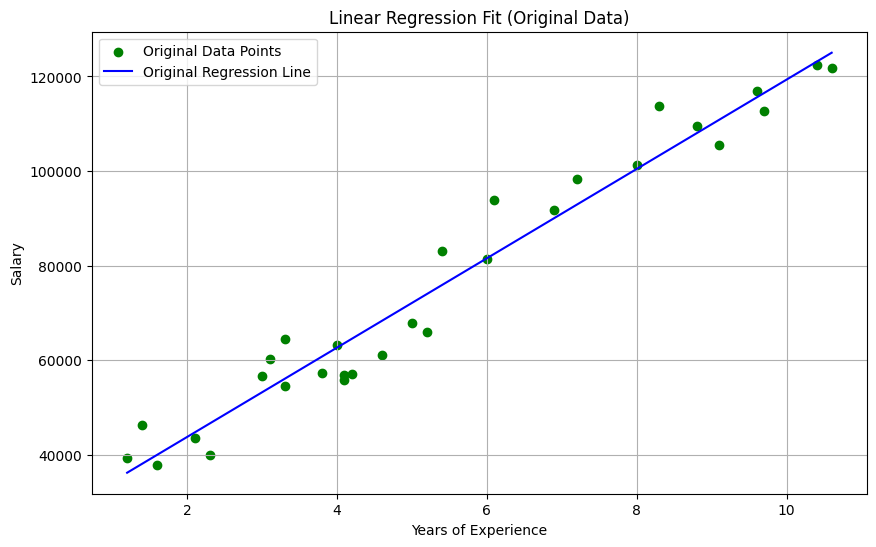

In [24]:
# 1. Original Data
plot_regression_fit(
    X=X,
    y=y,
    beta_0=beta_0_orig,
    beta_1=beta_1_orig,
    title="Linear Regression Fit (Original Data)",
    xlabel="Years of Experience",
    ylabel="Salary",
    scatter_color='green',
    line_color='blue',
    scatter_label="Original Data Points",
    line_label="Original Regression Line"
)

***Plot regression fit (Normalized Data)***

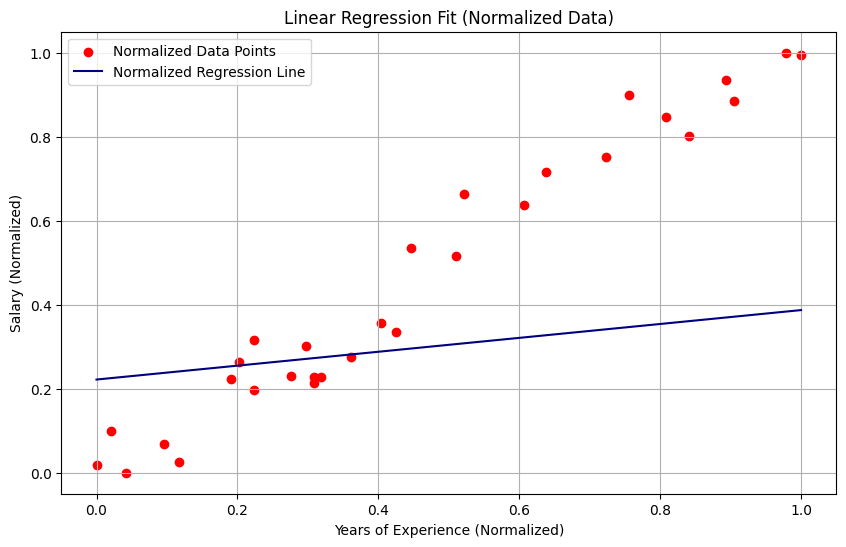

In [25]:
# 2. Normalized Data
plot_regression_fit(
    X=X_normalized,
    y=y_normalized,
    beta_0=beta_0_norm,
    beta_1=beta_1_norm,
    title="Linear Regression Fit (Normalized Data)",
    xlabel="Years of Experience (Normalized)",
    ylabel="Salary (Normalized)",
    scatter_color='red',
    line_color='navy',
    scatter_label="Normalized Data Points",
    line_label="Normalized Regression Line"
)

***Plot regression fit (Standardized Data)***

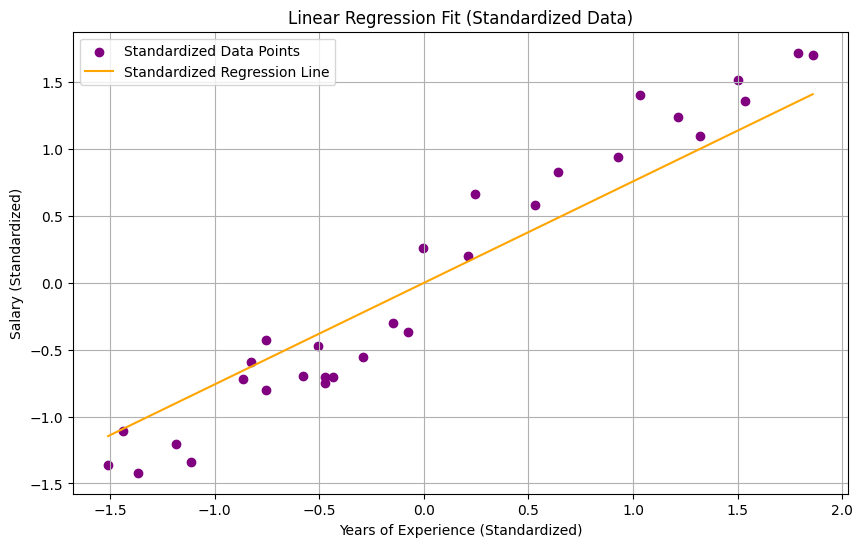

In [26]:
plot_regression_fit(
    X=X_standardized,
    y=y_standardized,
    beta_0=beta_0_std,
    beta_1=beta_1_std,
    title="Linear Regression Fit (Standardized Data)",
    xlabel="Years of Experience (Standardized)",
    ylabel="Salary (Standardized)",
    scatter_color='purple',
    line_color='orange',
    scatter_label="Standardized Data Points",
    line_label="Standardized Regression Line"
)

***Plot cost history function***

*This function draws how cost changes over iterations (lower = better). Helps visualize learning speed.

In [27]:
def plot_cost_history(cost_history, title="Cost Function Convergence",
                     xlabel="Iterations", ylabel="Cost",
                     line_label="Cost Function", color='blue'):
    plt.figure(figsize=(10, 6))
    plt.plot(cost_history, label=line_label, color=color)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

***Plot multiple cost histories function***

In [28]:
def plot_multiple_cost_histories(cost_histories, labels,
                                title="Cost Function Convergence Comparison",
                                xlabel="Iterations", ylabel="Cost",
                                colors=None):
    plt.figure(figsize=(10, 6))
    if colors is None:
        colors = ['blue', 'red', 'green']

    for i, (history, label) in enumerate(zip(cost_histories, labels)):
        plt.plot(history, label=label, color=colors[i % len(colors)])

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

***Plot multiple cost histories***

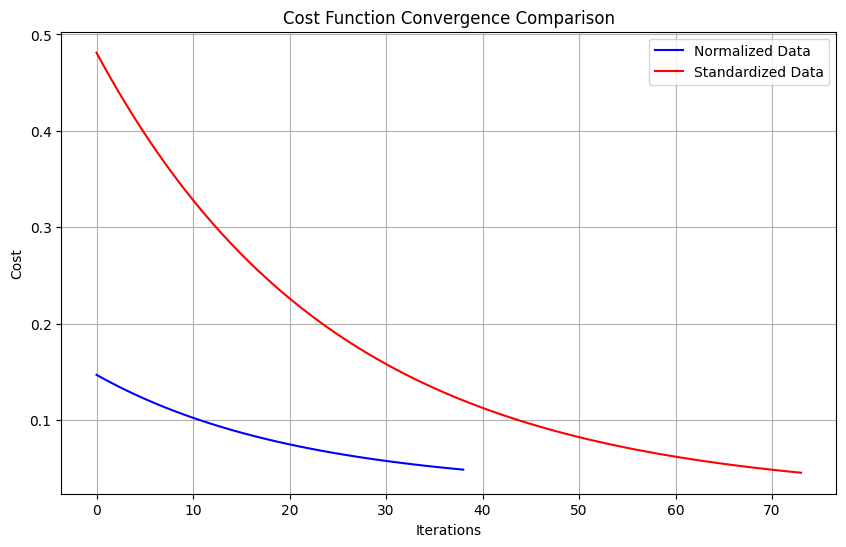

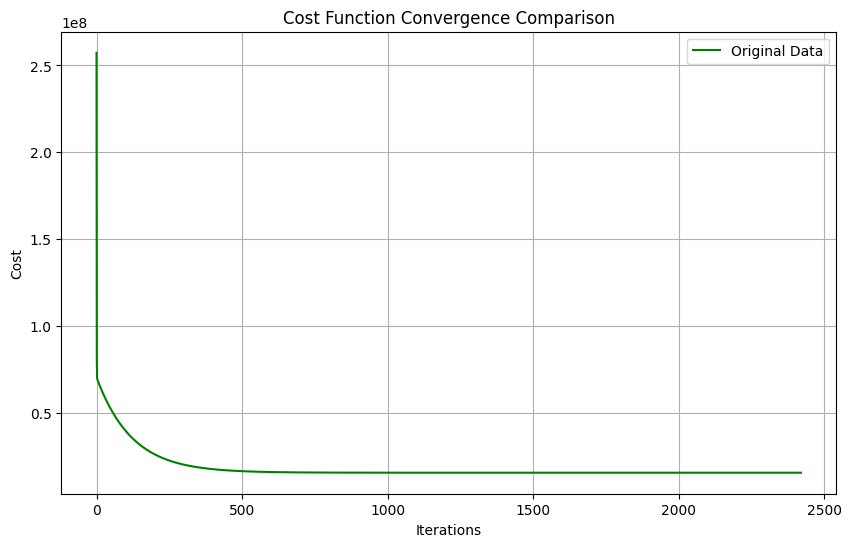

In [29]:
# 4. Plot all three cost histories together
plot_multiple_cost_histories(
    cost_histories=[cost_history_norm, cost_history_std],
    labels=["Normalized Data", "Standardized Data"],
    title="Cost Function Convergence Comparison",
    xlabel="Iterations",
    ylabel="Cost",
    colors=['blue', 'red', 'green']
)

plot_multiple_cost_histories(
    cost_histories=[cost_history_orig],
    labels=["Original Data"],
    title="Cost Function Convergence Comparison",
    xlabel="Iterations",
    ylabel="Cost",
    colors=['green']
)

***Plot cost vs intercept function***

*Shows how cost drops as intercept (β₀) gets updated. It helps us understand optimization visually.*

In [30]:
def plot_cost_vs_intercept(beta_0_history, cost_history,
                          title="Cost vs Intercept (β₀) During Gradient Descent",
                          xlabel="Intercept (β₀)", ylabel="Sum of Squared Residuals (Cost)",
                          curve_label="Cost Curve (from GD)", scatter_label="GD Steps",
                          curve_color='teal', scatter_color='red'):
    plt.figure(figsize=(10, 6))
    plt.plot(beta_0_history, cost_history, color=curve_color, label=curve_label)
    plt.scatter(beta_0_history, cost_history, color=scatter_color, s=60, label=scatter_label)
    plt.axhline(0, color='blue', linewidth=1)
    plt.axvline(0, color='blue', linewidth=1)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

***Plot multiple cost vs intercept function***

In [31]:
def plot_multiple_cost_vs_intercept(beta_0_histories, cost_histories, labels,
                                   title="Cost vs Intercept (β₀) Comparison",
                                   xlabel="Intercept (β₀)", ylabel="Sum of Squared Residuals (Cost)",
                                   curve_colors=None, scatter_colors=None,
                                   curve_labels=None, scatter_labels=None):
    plt.figure(figsize=(12, 8))
    if curve_colors is None:
        curve_colors = ['teal', 'purple', 'darkgreen']
    if scatter_colors is None:
        scatter_colors = ['red', 'blue', 'orange']
    if curve_labels is None:
        curve_labels = [f"{label} Curve" for label in labels]
    if scatter_labels is None:
        scatter_labels = [f"{label} Steps" for label in labels]

    for i, (b0_hist, cost_hist, curve_label, scatter_label) in enumerate(
        zip(beta_0_histories, cost_histories, curve_labels, scatter_labels)):
        plt.plot(b0_hist, cost_hist, color=curve_colors[i % len(curve_colors)],
                label=curve_label)
        plt.scatter(b0_hist, cost_hist, color=scatter_colors[i % len(scatter_colors)],
                   s=60, label=scatter_label)

    plt.axhline(0, color='blue', linewidth=1)
    plt.axvline(0, color='blue', linewidth=1)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

***Plot multiple cost vs intercept***

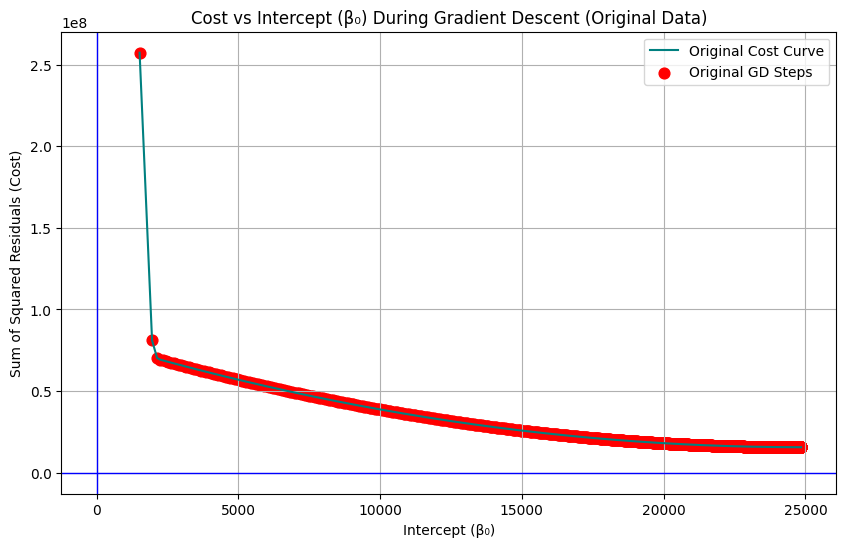

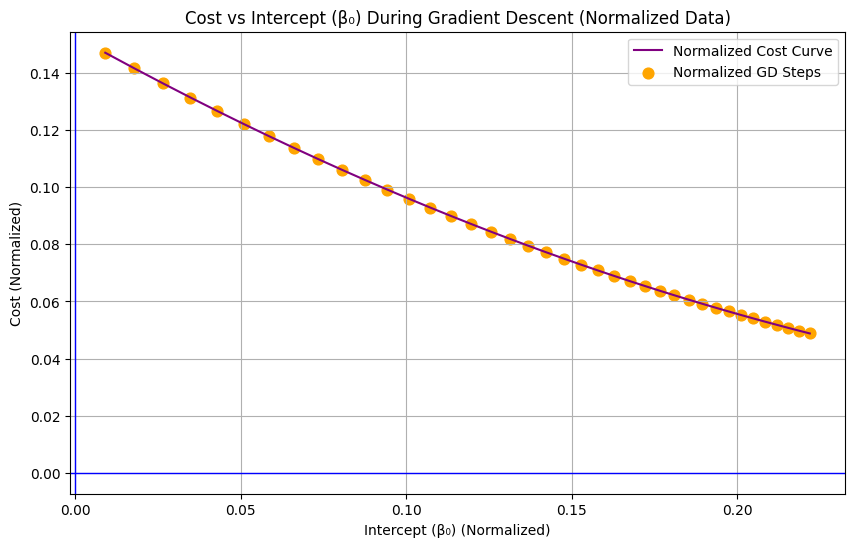

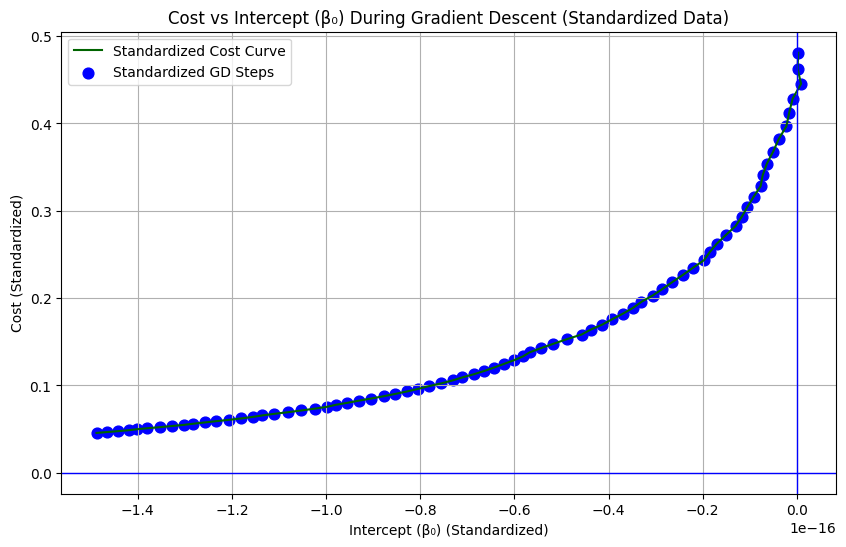

In [32]:
# 1. Original Data
plot_cost_vs_intercept(
    beta_0_history=beta_0_history_orig,
    cost_history=cost_history_orig,
    title="Cost vs Intercept (β₀) During Gradient Descent (Original Data)",
    xlabel="Intercept (β₀)",
    ylabel="Sum of Squared Residuals (Cost)",
    curve_label="Original Cost Curve",
    scatter_label="Original GD Steps",
    curve_color='teal',
    scatter_color='red'
)

# 2. Normalized Data
plot_cost_vs_intercept(
    beta_0_history=beta_0_history_norm,
    cost_history=cost_history_norm,
    title="Cost vs Intercept (β₀) During Gradient Descent (Normalized Data)",
    xlabel="Intercept (β₀) (Normalized)",
    ylabel="Cost (Normalized)",
    curve_label="Normalized Cost Curve",
    scatter_label="Normalized GD Steps",
    curve_color='purple',
    scatter_color='orange'
)

# 3. Standardized Data
plot_cost_vs_intercept(
    beta_0_history=beta_0_history_std,
    cost_history=cost_history_std,
    title="Cost vs Intercept (β₀) During Gradient Descent (Standardized Data)",
    xlabel="Intercept (β₀) (Standardized)",
    ylabel="Cost (Standardized)",
    curve_label="Standardized Cost Curve",
    scatter_label="Standardized GD Steps",
    curve_color='darkgreen',
    scatter_color='blue'
)

***3-D Cost function surface with gradient descent path***

*It's an amazing 3D plots show the full cost surface and how the algorithm moves step by step to the best point in a 3D world!*

In [33]:
def plot_cost_surface_3d(X, y, beta_0_history, beta_1_history, cost_history,
                        title="3D Cost Function Surface with Gradient Descent Path",
                        xlabel="β₁ (slope)", ylabel="β₀ (intercept)", zlabel="Cost (J)",
                        surface_cmap='viridis', path_color='red',
                        mesh_range=2000, mesh_points=100):
    # Ensure inputs are numpy arrays
    X = np.array(X).reshape(-1, 1)
    y = np.array(y).reshape(-1, 1)
    beta_0_history = np.array(beta_0_history)
    beta_1_history = np.array(beta_1_history)
    cost_history = np.array(cost_history)

    # Number of samples
    m = len(X)

    # Create meshgrid around final values
    b1_vals = np.linspace(min(beta_1_history) - mesh_range, max(beta_1_history) + mesh_range, mesh_points)
    b0_vals = np.linspace(min(beta_0_history) - mesh_range, max(beta_0_history) + mesh_range, mesh_points)
    B1, B0 = np.meshgrid(b1_vals, b0_vals)
    Cost = np.zeros(B1.shape)

    # Compute cost for each (β₁, β₀) pair
    for i in range(B1.shape[0]):
        for j in range(B1.shape[1]):
            Y_pred = B1[i, j] * X + B0[i, j]
            Cost[i, j] = (1/(2*m)) * np.sum((Y_pred - y) ** 2)

    # Create 3D plot
    fig = plt.figure(figsize=(14, 16))
    ax = fig.add_subplot(111, projection='3d')

    # Plot surface
    ax.plot_surface(B1, B0, Cost, cmap=surface_cmap, edgecolor='none', alpha=0.9)

    # Plot convergence path
    ax.plot(beta_1_history, beta_0_history, cost_history, color=path_color,
            label='Convergence Path', marker='o', markersize=3, linewidth=2)

    # Labels and title
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_zlabel(zlabel)
    ax.set_title(title)
    ax.legend()

    plt.show()

***Plot multiple 3D cost surface***

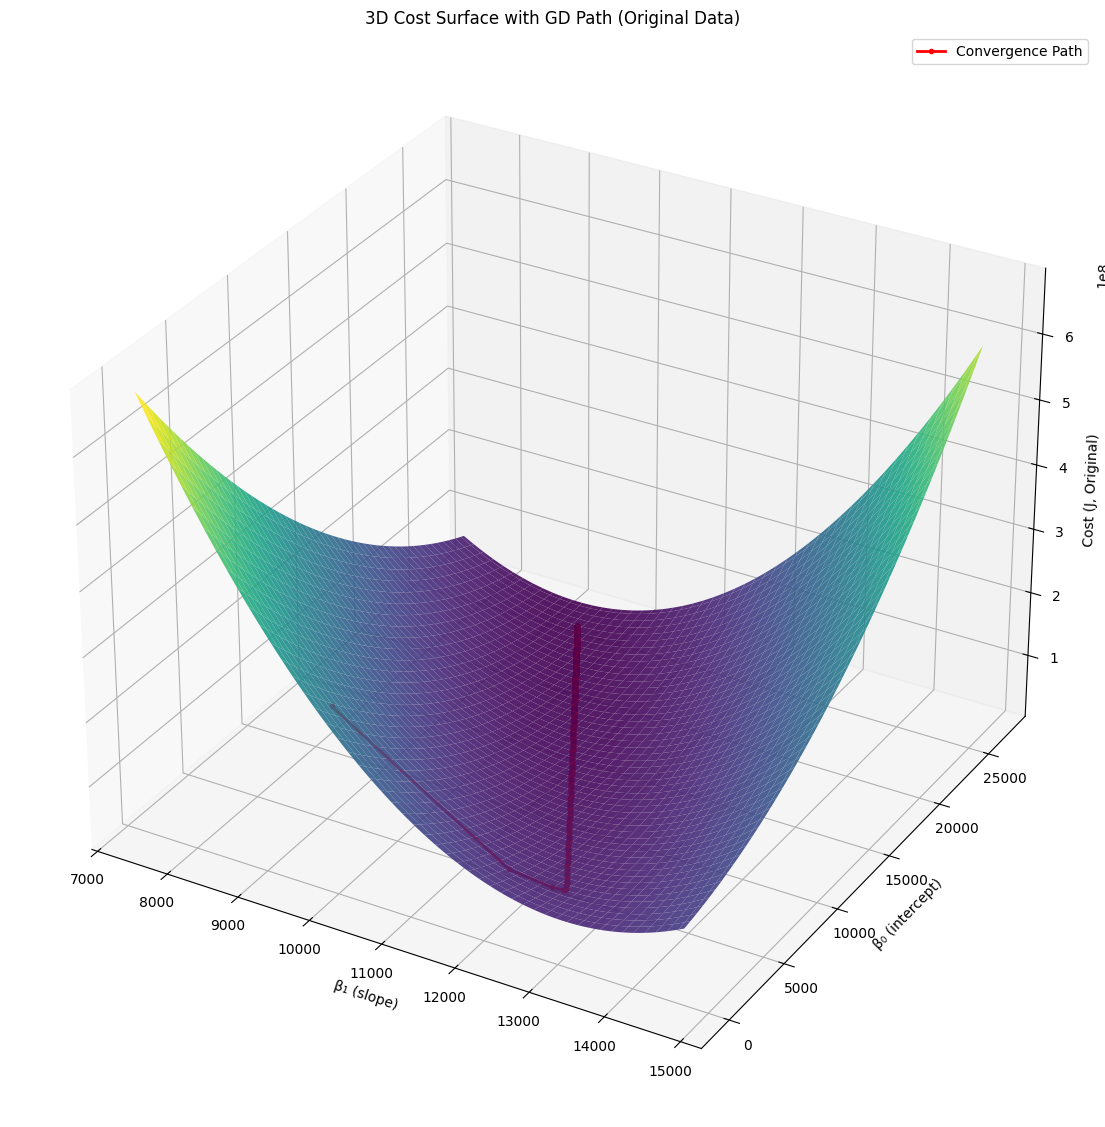

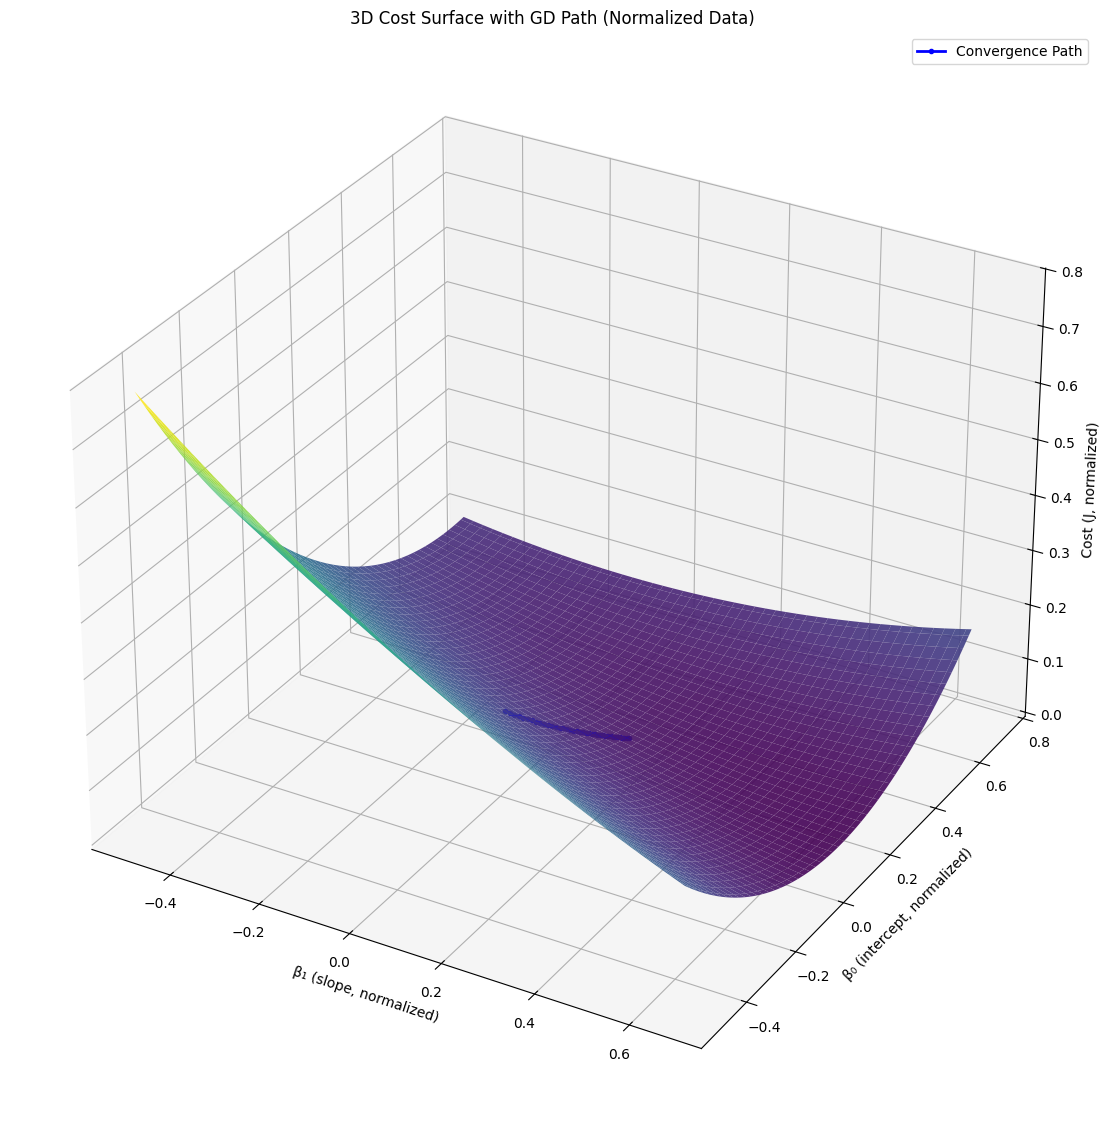

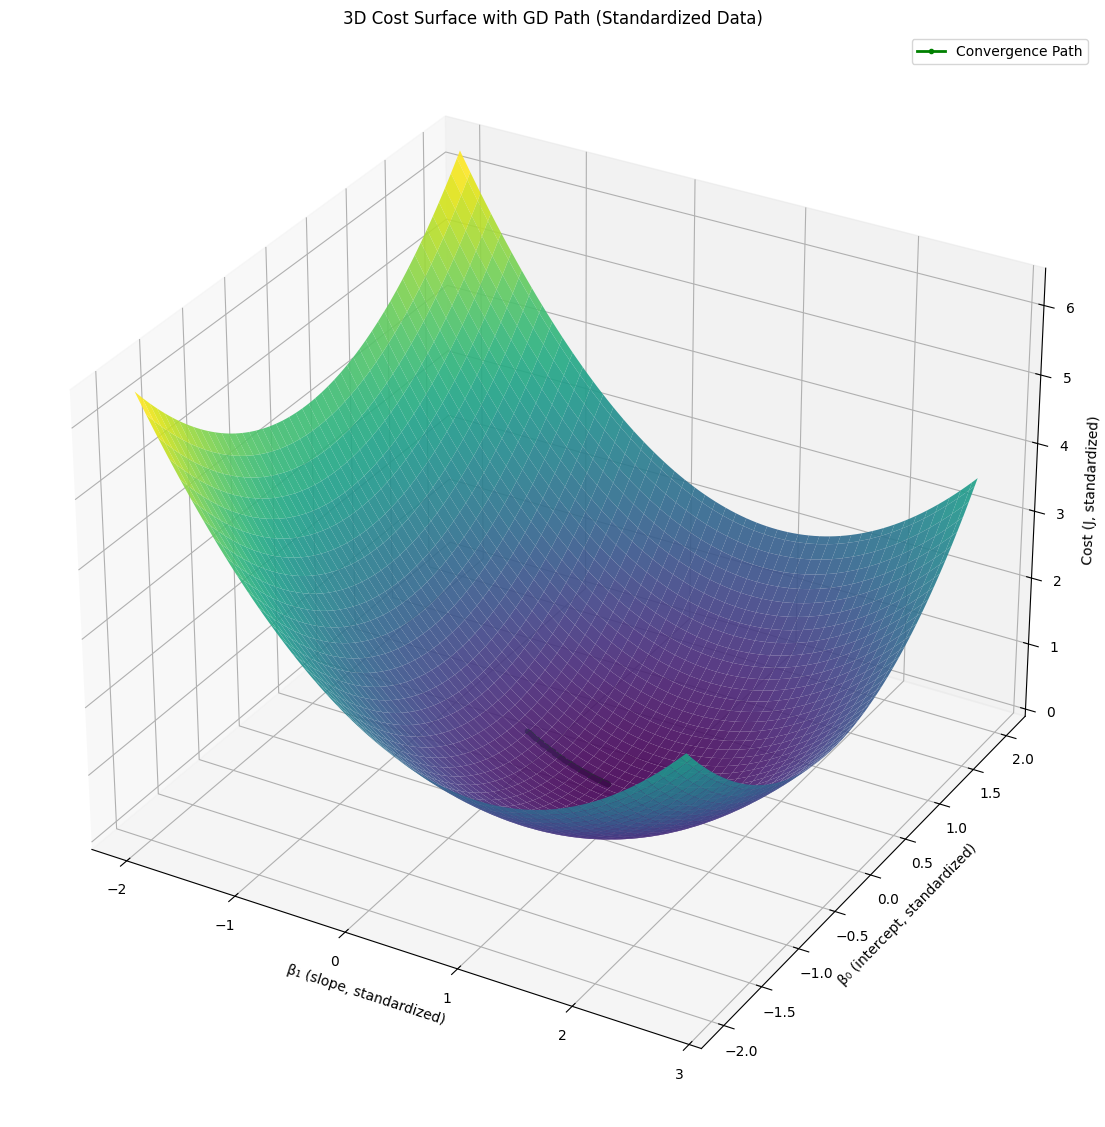

In [34]:
# 1. Original Data
plot_cost_surface_3d(
    X=X,
    y=y,
    beta_0_history=beta_0_history_orig,
    beta_1_history=beta_1_history_orig,
    cost_history=cost_history_orig,
    title="3D Cost Surface with GD Path (Original Data)",
    xlabel="β₁ (slope)",
    ylabel="β₀ (intercept)",
    zlabel="Cost (J, Original)",
    mesh_range=2000,  # Large for original scale
    mesh_points=100
)

# 2. Normalized Data
plot_cost_surface_3d(
    X=X_normalized,
    y=y_normalized,
    beta_0_history=beta_0_history_norm,
    beta_1_history=beta_1_history_norm,
    cost_history=cost_history_norm,
    title="3D Cost Surface with GD Path (Normalized Data)",
    xlabel="β₁ (slope, normalized)",
    ylabel="β₀ (intercept, normalized)",
    zlabel="Cost (J, normalized)",
    mesh_range=0.5,  # Smaller for normalized scale
    mesh_points=100,
    path_color='blue'
)

# 3. Standardized Data
plot_cost_surface_3d(
    X=X_standardized,
    y=y_standardized,
    beta_0_history=beta_0_history_std,
    beta_1_history=beta_1_history_std,
    cost_history=cost_history_std,
    title="3D Cost Surface with GD Path (Standardized Data)",
    xlabel="β₁ (slope, standardized)",
    ylabel="β₀ (intercept, standardized)",
    zlabel="Cost (J, standardized)",
    mesh_range=2,  # Moderate for standardized scale
    mesh_points=100,
    path_color='green'
)

***3-D Cost wireframe surface with gradient descent path***

*Same as above but with wireframe style it gives a clearer view of the GD path in 3D world!*

In [35]:
def plot_cost_wireframe_3d(X, y, beta_0_history, beta_1_history, cost_history,
                          title="3D Cost Wireframe with Gradient Descent Path",
                          xlabel="β₁ (slope)", ylabel="β₀ (intercept)", zlabel="Cost (J)",
                          wire_color='gray', path_color='red',
                          mesh_range=2000, mesh_points=100):
    # Ensure inputs are numpy arrays
    X = np.array(X).reshape(-1, 1)
    y = np.array(y).reshape(-1, 1)
    beta_0_history = np.array(beta_0_history)
    beta_1_history = np.array(beta_1_history)
    cost_history = np.array(cost_history)

    # Number of samples
    m = len(X)

    # Create meshgrid around history values
    b1_vals = np.linspace(min(beta_1_history) - mesh_range, max(beta_1_history) + mesh_range, mesh_points)
    b0_vals = np.linspace(min(beta_0_history) - mesh_range, max(beta_0_history) + mesh_range, mesh_points)
    B1, B0 = np.meshgrid(b1_vals, b0_vals)
    Cost = np.zeros(B1.shape)

    # Compute cost for each (β₁, β₀) pair
    for i in range(B1.shape[0]):
        for j in range(B1.shape[1]):
            Y_pred = B1[i, j] * X + B0[i, j]
            Cost[i, j] = (1/(2*m)) * np.sum((Y_pred - y) ** 2)

    # Create 3D plot
    fig = plt.figure(figsize=(12, 12))
    ax = fig.add_subplot(111, projection='3d')

    # Plot wireframe
    ax.plot_wireframe(B1, B0, Cost, color=wire_color, alpha=0.7)

    # Plot convergence path
    ax.plot(beta_1_history, beta_0_history, cost_history, color=path_color,
            label='Convergence Path', marker='o', markersize=3, linewidth=2)

    # Labels and title
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_zlabel(zlabel)
    ax.set_title(title)
    ax.legend()

    plt.show()

***Plot multiple cost 3D wireframe surface***

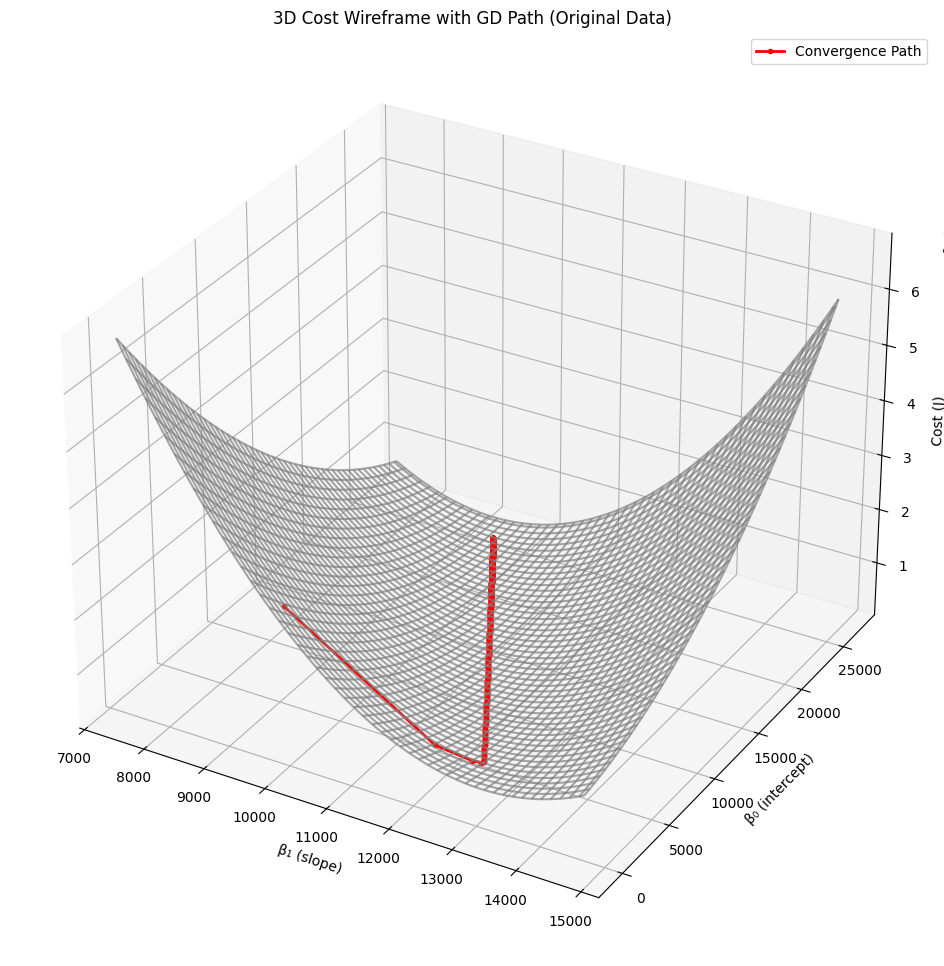

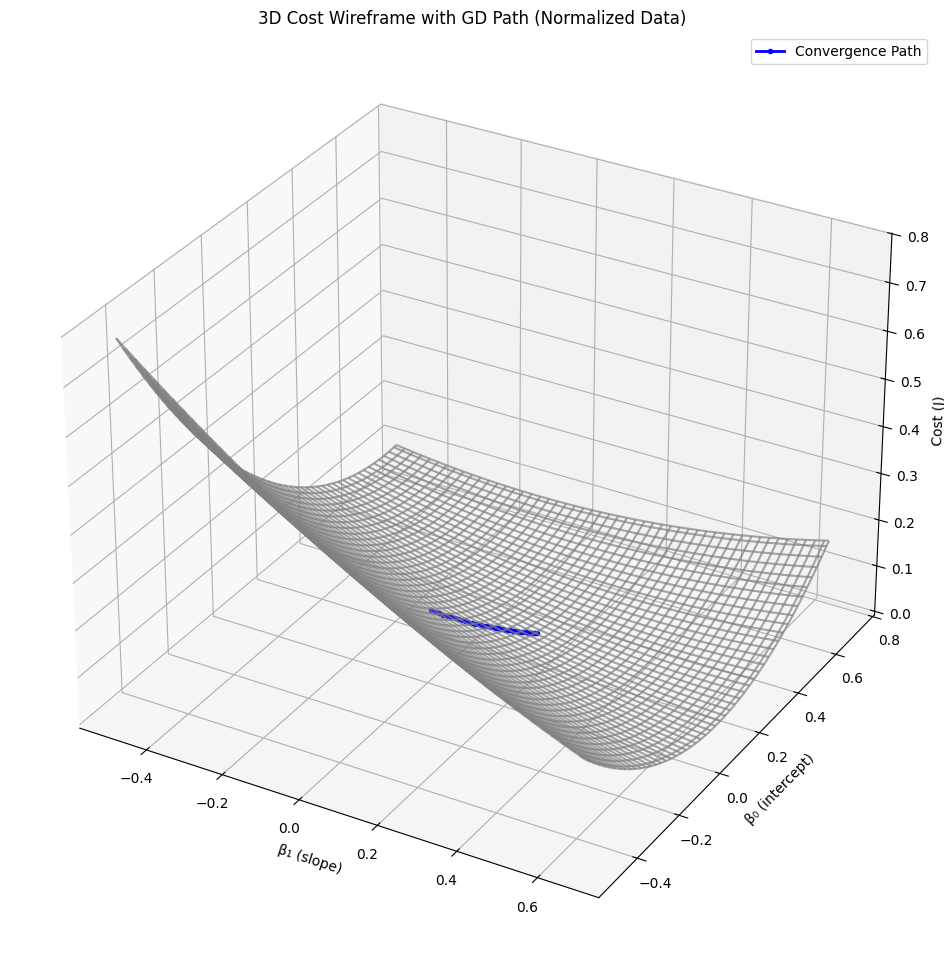

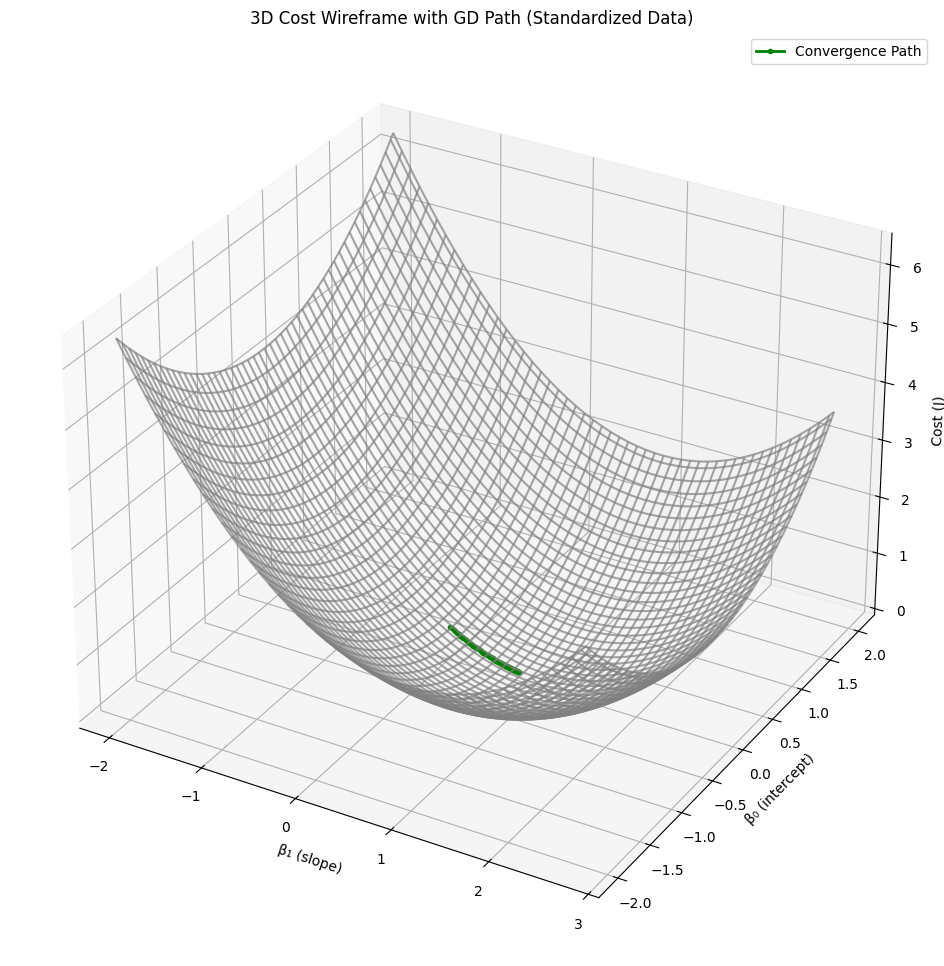

In [36]:
# 1. Original Data
plot_cost_wireframe_3d(
    X=X,
    y=y,
    beta_0_history=beta_0_history_orig,
    beta_1_history=beta_1_history_orig,
    cost_history=cost_history_orig,
    title="3D Cost Wireframe with GD Path (Original Data)",
    mesh_range=2000,
    wire_color='gray',
    path_color='red'
)

# 2. Normalized Data
plot_cost_wireframe_3d(
    X=X_normalized,
    y=y_normalized,
    beta_0_history=beta_0_history_norm,
    beta_1_history=beta_1_history_norm,
    cost_history=cost_history_norm,
    title="3D Cost Wireframe with GD Path (Normalized Data)",
    mesh_range=0.5,
    wire_color='gray',
    path_color='blue'
)

# 3. Standardized Data
plot_cost_wireframe_3d(
    X=X_standardized,
    y=y_standardized,
    beta_0_history=beta_0_history_std,
    beta_1_history=beta_1_history_std,
    cost_history=cost_history_std,
    title="3D Cost Wireframe with GD Path (Standardized Data)",
    mesh_range=2,
    wire_color='gray',
    path_color='green'
)

***Positive and Negative adjustments on gradient descent***

*To visually and mathematically show how using +α or −α in the gradient update formula affects the convergence of gradient descent.*

🧮 Equations Explained Simply:
Here are the two equations you've referenced:

**1. βⱼ = βⱼ − α * (ŷ − y) * xⱼ**

*This is the correct update rule for gradient descent.*

*It moves βⱼ in the direction that reduces the cost.*

**2. β₀ = β₀ + α * (ŷ − y) * xⱼ**

*This equation uses a positive adjustment, which means you're updating in the wrong direction.*

*Instead of minimizing error, you increase it — the model diverges.*

***GD Adjustment function***

Created a function that:

🔹 Allows switching between −α (default) and +α (wrong).

🔹 Stores the history of slope (β₁), intercept (β₀), and cost at each step.

Then I ran:

🔹 run_gradient_descent_adj(..., positive_adjustment=False)  # Normal GD

🔹 run_gradient_descent_adj(..., positive_adjustment=True)   # Inverse GD

**For each of:**

🔹 Original data

🔹 Normalized data

🔹 Standardized data

*This lets me compare and visualize both behaviors.*

In [37]:
def run_gradient_descent_adj(X, y, alpha, max_iterations, positive_adjustment=False):
    beta_1 = 0
    beta_0 = 0
    beta_1_history = []
    beta_0_history = []
    cost_history = []
    m = len(X)

    for iteration in range(max_iterations):
        Y_pred = beta_1 * X + beta_0
        gradient_beta_1 = (2/m) * np.sum((Y_pred - y) * X)
        gradient_beta_0 = (2/m) * np.sum((Y_pred - y))
        if positive_adjustment:
            beta_1 = beta_1 + alpha * gradient_beta_1
            beta_0 = beta_0 + alpha * gradient_beta_0
        else:
            beta_1 = beta_1 - alpha * gradient_beta_1
            beta_0 = beta_0 - alpha * gradient_beta_0
        Y_pred_new = beta_1 * X + beta_0
        cost_new = (1/(2*m)) * np.sum((Y_pred_new - y)**2)
        beta_1_history.append(beta_1)
        beta_0_history.append(beta_0)
        cost_history.append(cost_new)
    return beta_1_history, beta_0_history, cost_history


***Running GD Adj***

In [38]:
# Parameters
alpha = 0.01
max_iterations_neg = 100
max_iterations_pos = 20  # Limit for positive adjustment to avoid overflow

# Run gradient descent

# Original
beta_1_neg_orig, beta_0_neg_orig, cost_neg_orig = run_gradient_descent_adj(
    X, y, alpha, max_iterations_neg, positive_adjustment=False
)
beta_1_pos_orig, beta_0_pos_orig, cost_pos_orig = run_gradient_descent_adj(
    X, y, alpha, max_iterations_pos, positive_adjustment=True
)

# Normalized
beta_1_neg_norm, beta_0_neg_norm, cost_neg_norm = run_gradient_descent_adj(
    X_normalized, y_normalized, alpha, max_iterations_neg, positive_adjustment=False
)
beta_1_pos_norm, beta_0_pos_norm, cost_pos_norm = run_gradient_descent_adj(
    X_normalized, y_normalized, alpha, max_iterations_pos, positive_adjustment=True
)

# Standardized
beta_1_neg_std, beta_0_neg_std, cost_neg_std = run_gradient_descent_adj(
    X_standardized, y_standardized, alpha, max_iterations_neg, positive_adjustment=False
)
beta_1_pos_std, beta_0_pos_std, cost_pos_std = run_gradient_descent_adj(
    X_standardized, y_standardized, alpha, max_iterations_pos, positive_adjustment=True
)

***Plot Regression Suplot***

In [39]:
def plot_regression_subplots(X, y, beta_1_neg, beta_0_neg, beta_1_pos, beta_0_pos,
                            neg_iterations=None, pos_iterations=None,
                            title_neg="Negative Adjustment: Regression Line",
                            title_pos="Positive Adjustment: Regression Line",
                            xlabel="X", ylabel="Y",
                            scatter_color='green', line_colors=None,
                            neg_labels=None, pos_labels=None,
                            xlim_pos=None, ylim_pos=None):
    X = np.array(X).flatten()
    y = np.array(y).flatten()

    if neg_iterations is None:
        neg_iterations = [0, 1, 4]
    if pos_iterations is None:
        pos_iterations = [0, 1, 2]
    if line_colors is None:
        line_colors = ['blue', 'orange', 'red']
    if neg_labels is None:
        neg_labels = [f"Iter {i+1}" for i in neg_iterations]
    if pos_labels is None:
        pos_labels = [f"Iter {i+1}" for i in pos_iterations]

    plt.figure(figsize=(12, 6))

    # Negative Adjustment
    plt.subplot(1, 2, 1)
    plt.scatter(X, y, color=scatter_color, label='Data Points')
    for i, color, label in zip(neg_iterations, line_colors, neg_labels):
        plt.plot(X, beta_1_neg[i] * X + beta_0_neg[i], color=color, label=label)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title_neg)
    plt.legend()
    plt.grid(True)

    # Positive Adjustment
    plt.subplot(1, 2, 2)
    plt.scatter(X, y, color=scatter_color, label='Data Points')
    for i, color, label in zip(pos_iterations, line_colors, pos_labels):
        plt.plot(X, beta_1_pos[i] * X + beta_0_pos[i], color=color, label=label)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title_pos)
    if xlim_pos:
        plt.xlim(xlim_pos)
    if ylim_pos:
        plt.ylim(ylim_pos)
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# print("\nNegative Adjustment Line Details:")
# for i in [0, 9, 49]:
#     print(f"Iteration {i+1}: beta_1 = {beta_1_neg[i]:.4f}, beta_0 = {beta_0_neg[i]:.4f}")

# print("\nPositive Adjustment Line Details:")
# for i in [0, 9, 19]:
#     print(f"Iteration {i+1}: beta_1 = {beta_1_pos[i]:.4f}, beta_0 = {beta_0_pos[i]:.4f}")

***Calls for regression subplot***

These are side-by-side plots:

🔹 Left = Negative Adjustment (−α):

    🔹 The regression line gradually fits the data better with each iteration.

    🔹 Slope (β₁) and intercept (β₀) stabilize over time.

    🔹 Model converges to minimum cost.

🔹 Right = Positive Adjustment (+α):

    🔹 The regression line goes far away from the data points.

    🔹 Parameters (β₀, β₁) explode quickly (divergence).

    🔹 Model fails to converge — it gets worse over time.

✅ These clearly demonstrate:

🔹 Correct sign (−α) leads to successful learning.

🔹 Wrong sign (+α) leads to divergence and useless predictions.


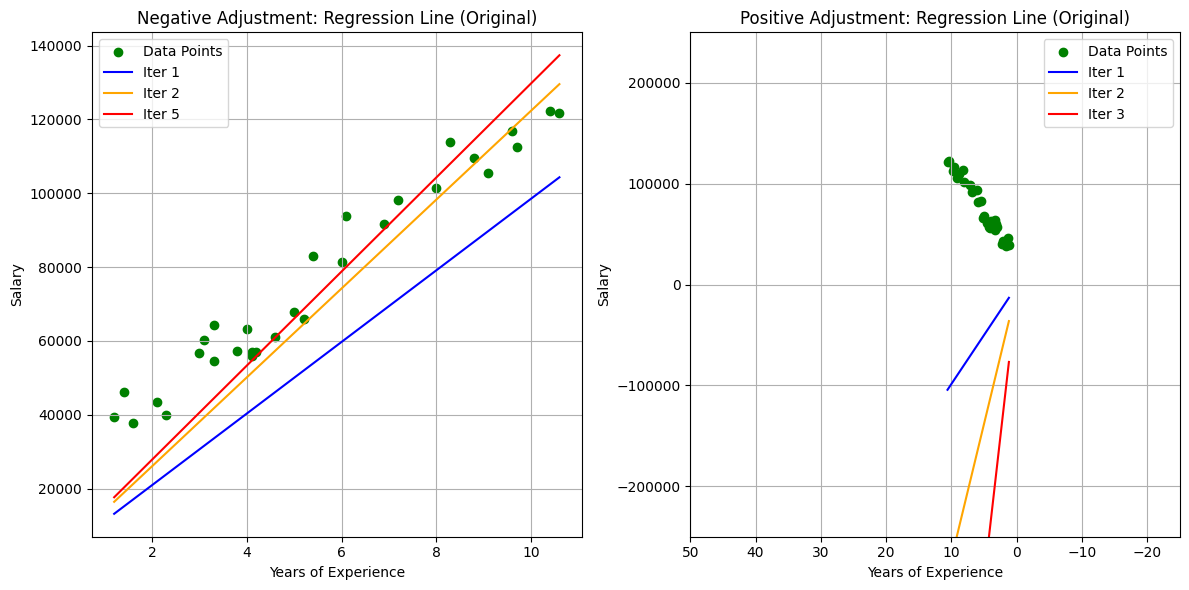

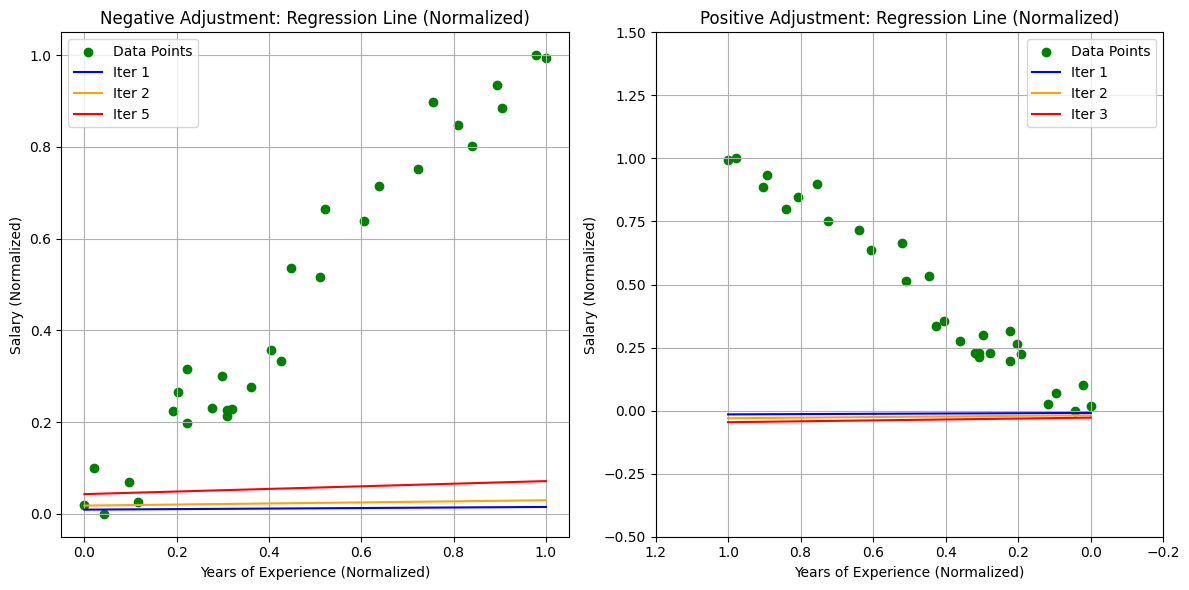

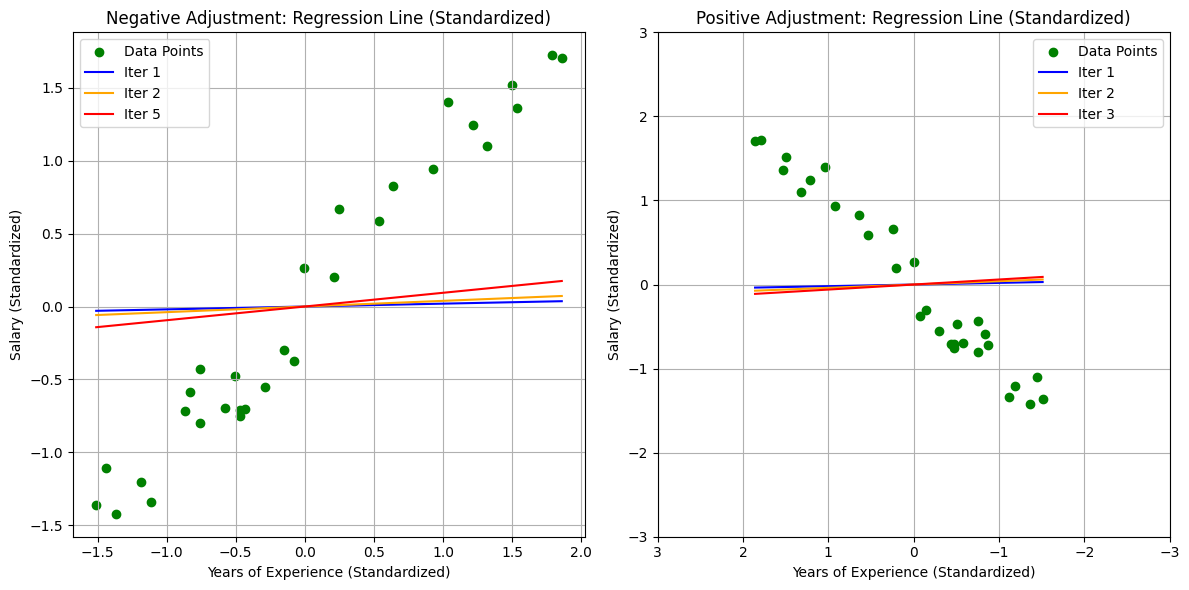

In [40]:
# 1. Original Data
plot_regression_subplots(
    X=X,
    y=y,
    beta_1_neg=beta_1_neg_orig,
    beta_0_neg=beta_0_neg_orig,
    beta_1_pos=beta_1_pos_orig,
    beta_0_pos=beta_0_pos_orig,
    neg_iterations=[0, 1, 4],
    pos_iterations=[0, 1, 2],
    title_neg="Negative Adjustment: Regression Line (Original)",
    title_pos="Positive Adjustment: Regression Line (Original)",
    xlabel="Years of Experience",
    ylabel="Salary",
    xlim_pos=(50, -25),  # Your custom limits
    ylim_pos=(-250000, 250000)
)

# 2. Normalized Data
plot_regression_subplots(
    X=X_normalized,
    y=y_normalized,
    beta_1_neg=beta_1_neg_norm,
    beta_0_neg=beta_0_neg_norm,
    beta_1_pos=beta_1_pos_norm,
    beta_0_pos=beta_0_pos_norm,
    neg_iterations=[0, 1, 4],
    pos_iterations=[0, 1, 2],
    title_neg="Negative Adjustment: Regression Line (Normalized)",
    title_pos="Positive Adjustment: Regression Line (Normalized)",
    xlabel="Years of Experience (Normalized)",
    ylabel="Salary (Normalized)",
    xlim_pos=(1.2, -0.2),  # Adjusted for normalized scale
    ylim_pos=(-0.5, 1.5)
)

# 3. Standardized Data
plot_regression_subplots(
    X=X_standardized,
    y=y_standardized,
    beta_1_neg=beta_1_neg_std,
    beta_0_neg=beta_0_neg_std,
    beta_1_pos=beta_1_pos_std,
    beta_0_pos=beta_0_pos_std,
    neg_iterations=[0, 1, 4],
    pos_iterations=[0, 1, 2],
    title_neg="Negative Adjustment: Regression Line (Standardized)",
    title_pos="Positive Adjustment: Regression Line (Standardized)",
    xlabel="Years of Experience (Standardized)",
    ylabel="Salary (Standardized)",
    xlim_pos=(3, -3),  # Adjusted for standardized scale
    ylim_pos=(-3, 3)
)

***Parameter Evolution Subplot***

*The curves show how β₀ and β₁ change over time for both +α and −α.*

🔹 In negative adjustment:

    🔹 Both β₀ and β₁ approach fixed values smoothly.

🔹 In positive adjustment:

    🔹 Parameters grow rapidly and don’t settle it's a sign of instability.

*Below in some cases negative adjustment also leads to instability this is because data shape is not good enough and other results are not good enough also. So don't be sad.

In [41]:
def plot_parameter_evolution(beta_1_neg, beta_0_neg, beta_1_pos, beta_0_pos,
                            title_beta1="β₁ Evolution Over Iterations",
                            title_beta0="β₀ Evolution Over Iterations",
                            xlabel="Iteration",
                            ylabel_beta1="β₁ (Slope)", ylabel_beta0="β₀ (Intercept)",
                            neg_color='blue', pos_color='red', final_color='blue',
                            neg_label="Negative Adjustment (−α)", pos_label="Positive Adjustment (+α)",
                            final_label_beta1="Final β₁ (Neg)", final_label_beta0="Final β₀ (Neg)",
                            figsize=(14, 5)):
    # Convert to numpy arrays for consistency
    beta_1_neg = np.array(beta_1_neg)
    beta_0_neg = np.array(beta_0_neg)
    beta_1_pos = np.array(beta_1_pos)
    beta_0_pos = np.array(beta_0_pos)

    plt.figure(figsize=figsize)

    # β₁ Evolution
    plt.subplot(1, 2, 1)
    plt.plot(beta_1_neg, label=neg_label, color=neg_color, linewidth=2)
    plt.plot(beta_1_pos, label=pos_label, color=pos_color, linewidth=2, linestyle='--')
    plt.axhline(beta_1_neg[-1], color=final_color, linestyle=':', label=final_label_beta1)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel_beta1)
    plt.title(title_beta1)
    plt.legend()
    plt.grid(True)

    # β₀ Evolution
    plt.subplot(1, 2, 2)
    plt.plot(beta_0_neg, label=neg_label, color=neg_color, linewidth=2)
    plt.plot(beta_0_pos, label=pos_label, color=pos_color, linewidth=2, linestyle='--')
    plt.axhline(beta_0_neg[-1], color=final_color, linestyle=':', label=final_label_beta0)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel_beta0)
    plt.title(title_beta0)
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

***Calls for parameter evolution plots***

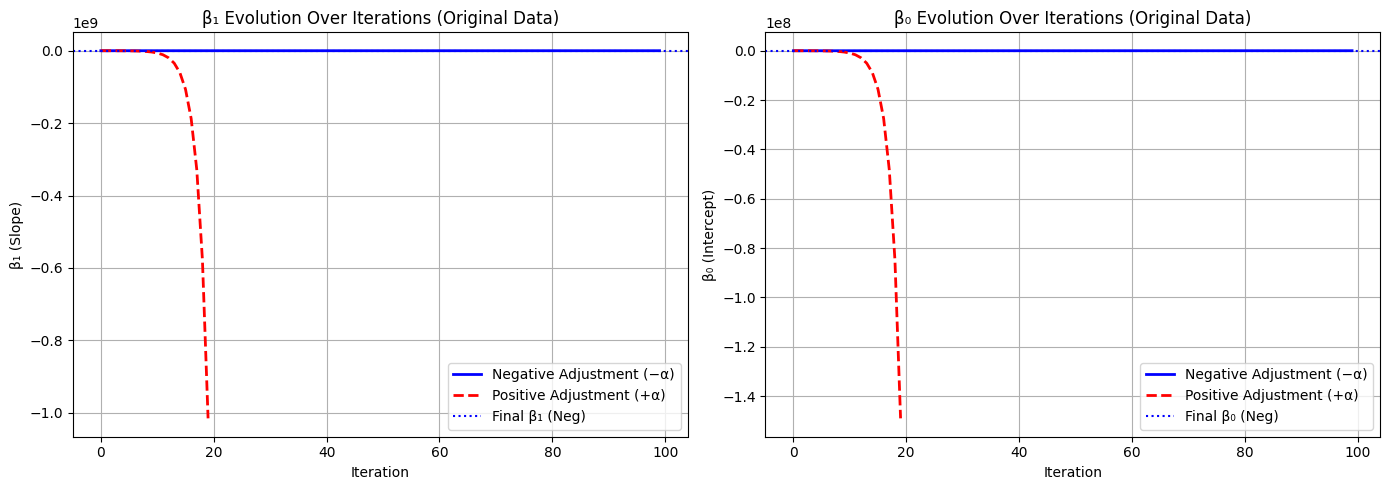

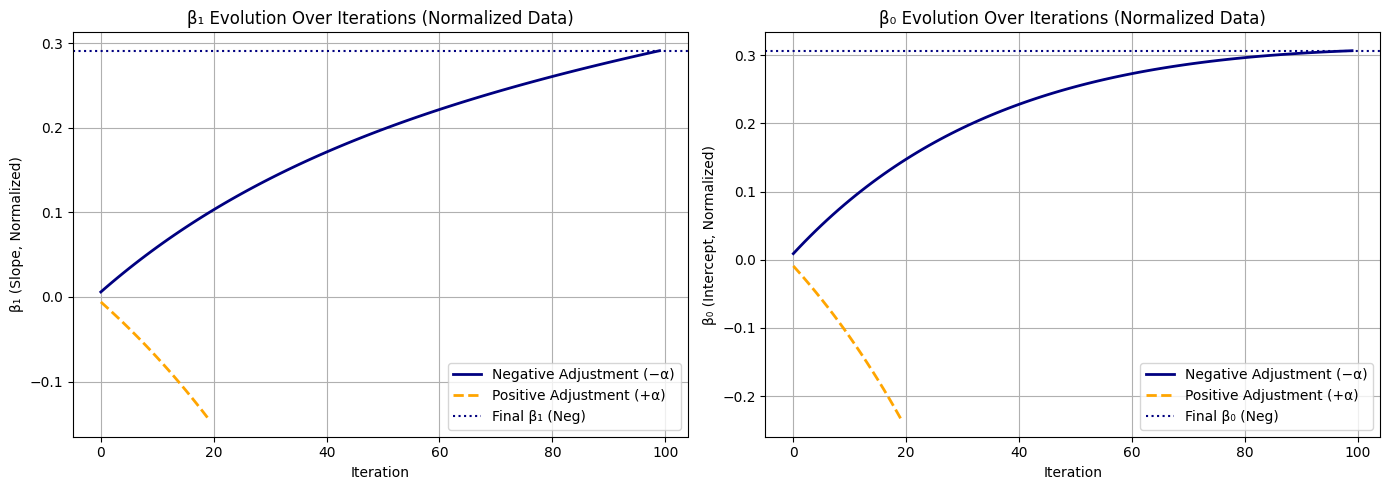

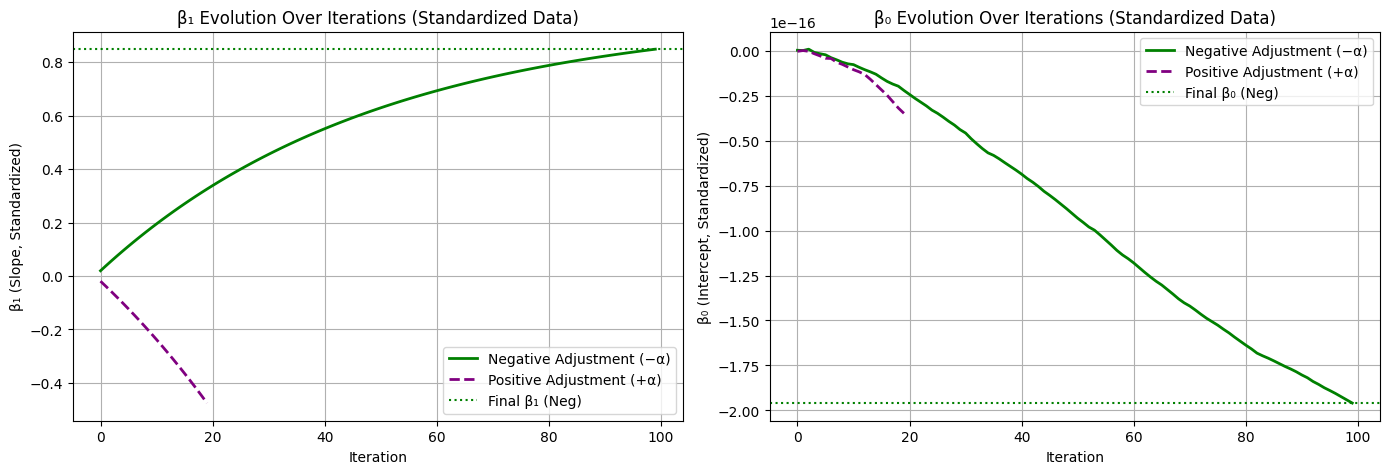

In [42]:
# 1. Original Data
plot_parameter_evolution(
    beta_1_neg=beta_1_neg_orig,
    beta_0_neg=beta_0_neg_orig,
    beta_1_pos=beta_1_pos_orig,
    beta_0_pos=beta_0_pos_orig,
    title_beta1="β₁ Evolution Over Iterations (Original Data)",
    title_beta0="β₀ Evolution Over Iterations (Original Data)",
    ylabel_beta1="β₁ (Slope)",
    ylabel_beta0="β₀ (Intercept)"
)

# 2. Normalized Data
plot_parameter_evolution(
    beta_1_neg=beta_1_neg_norm,
    beta_0_neg=beta_0_neg_norm,
    beta_1_pos=beta_1_pos_norm,
    beta_0_pos=beta_0_pos_norm,
    title_beta1="β₁ Evolution Over Iterations (Normalized Data)",
    title_beta0="β₀ Evolution Over Iterations (Normalized Data)",
    ylabel_beta1="β₁ (Slope, Normalized)",
    ylabel_beta0="β₀ (Intercept, Normalized)",
    neg_color='navy',
    pos_color='orange',
    final_color='navy'
)

# 3. Standardized Data
plot_parameter_evolution(
    beta_1_neg=beta_1_neg_std,
    beta_0_neg=beta_0_neg_std,
    beta_1_pos=beta_1_pos_std,
    beta_0_pos=beta_0_pos_std,
    title_beta1="β₁ Evolution Over Iterations (Standardized Data)",
    title_beta0="β₀ Evolution Over Iterations (Standardized Data)",
    ylabel_beta1="β₁ (Slope, Standardized)",
    ylabel_beta0="β₀ (Intercept, Standardized)",
    neg_color='green',
    pos_color='purple',
    final_color='green'
)

# **Analysis**

***Running Gradient Descent***

In [43]:
result = gradient_descent(X, y, alpha=0.01, max_iterations=5000, tolerance=1e-3)

# print("\nFinal Results:")
# print("Beta_0:", result['beta_0'])
# print("Beta_1:", result['beta_1'])
# print("Total Iterations:", result['iterations'])
# print("Time Taken (s):", result['time_taken'])

Iteration 1: Cost = 257309737.030703, beta_1 = 9700.0883, beta_0 = 1520.0800
Iteration 2: Cost = 81062156.086370, beta_1 = 12040.2064, beta_0 = 1959.5622
Iteration 3: Cost = 70292500.301936, beta_1 = 12596.8748, beta_0 = 2136.8979
Iteration 4: Cost = 69243256.108534, beta_1 = 12721.4145, beta_0 = 2250.4183
Iteration 5: Cost = 68768219.789286, beta_1 = 12741.2818, beta_0 = 2348.1848
Iteration 6: Cost = 68330292.678192, beta_1 = 12735.8270, beta_0 = 2441.8450
Iteration 7: Cost = 67897908.196714, beta_1 = 12724.2782, beta_0 = 2534.2226
Iteration 8: Cost = 67469185.144562, beta_1 = 12711.2947, beta_0 = 2626.0029
Iteration 9: Cost = 67043985.691156, beta_1 = 12698.0055, beta_0 = 2717.3534
Iteration 10: Cost = 66622274.602124, beta_1 = 12684.6838, beta_0 = 2808.3156
Iteration 11: Cost = 66204022.890242, beta_1 = 12671.3958, beta_0 = 2898.9008
Iteration 12: Cost = 65789202.155939, beta_1 = 12658.1573, beta_0 = 2989.1130
Iteration 13: Cost = 65377784.253154, beta_1 = 12644.9719, beta_0 = 3078.

***Number of iteration gradient descent take to converged***

In [44]:
print("Total Iterations (Original Data):", iterations_orig)
print("Total Iterations (Normalized Data):", iterations_norm)
print("Total Iterations (Standardized Data):", iterations_std)

Total Iterations (Original Data): 2422
Total Iterations (Normalized Data): 39
Total Iterations (Standardized Data): 74


***Time taken to run all iterations***

In [45]:
print("Time Taken for GD on Original Data (s):", time_taken_orig)
print("Time Taken for GD on Normalized Data (s):", time_taken_norm)
print("Time Taken for GD on Standardized Data (s):", time_taken_std)

Time Taken for GD on Original Data (s): 0.10055136680603027
Time Taken for GD on Normalized Data (s): 0.0024831295013427734
Time Taken for GD on Standardized Data (s): 0.009637117385864258


***Identifying and discussing factors that influence the outcome and performance of algorithm.***

*I have used many factors but more important in my code and visualizations are explained clearly below.*

**1. Learning Rate**

***The learning rate controls how big the step is in each iteration when updating the slope and intercept.***

🔹 If it's too small (like 0.005), it takes more iterations to reach the minimum cost.

🔹 If it's too big (like 0.05+), it can overshoot or even diverge (go to NaN/infinity).

***I have compared different learning rates and plotted:***

🔹 Final regression lines for each alpha

🔹 Cost convergence comparison

🔹 Cost vs β₀ plots


***Plot clearly shows:***

🔹 Smaller α is slow and steady

🔹 Bigger α reaches good results quickly (if not too big)



Streaming output truncated to the last 5000 lines.
Iteration 1001: Cost = 16536321.443972, beta_1 = 9879.9286, beta_0 = 21918.6219
Iteration 1002: Cost = 16532622.759652, beta_1 = 9879.0450, beta_0 = 21924.6422
Iteration 1003: Cost = 16528939.261358, beta_1 = 9878.1632, beta_0 = 21930.6501
Iteration 1004: Cost = 16525270.886742, beta_1 = 9877.2833, beta_0 = 21936.6457
Iteration 1005: Cost = 16521617.573707, beta_1 = 9876.4051, beta_0 = 21942.6290
Iteration 1006: Cost = 16517979.260415, beta_1 = 9875.5288, beta_0 = 21948.6000
Iteration 1007: Cost = 16514355.885280, beta_1 = 9874.6543, beta_0 = 21954.5587
Iteration 1008: Cost = 16510747.386968, beta_1 = 9873.7815, beta_0 = 21960.5052
Iteration 1009: Cost = 16507153.704398, beta_1 = 9872.9106, beta_0 = 21966.4394
Iteration 1010: Cost = 16503574.776741, beta_1 = 9872.0414, beta_0 = 21972.3615
Iteration 1011: Cost = 16500010.543415, beta_1 = 9871.1740, beta_0 = 21978.2713
Iteration 1012: Cost = 16496460.944088, beta_1 = 9870.3084, beta_0 = 

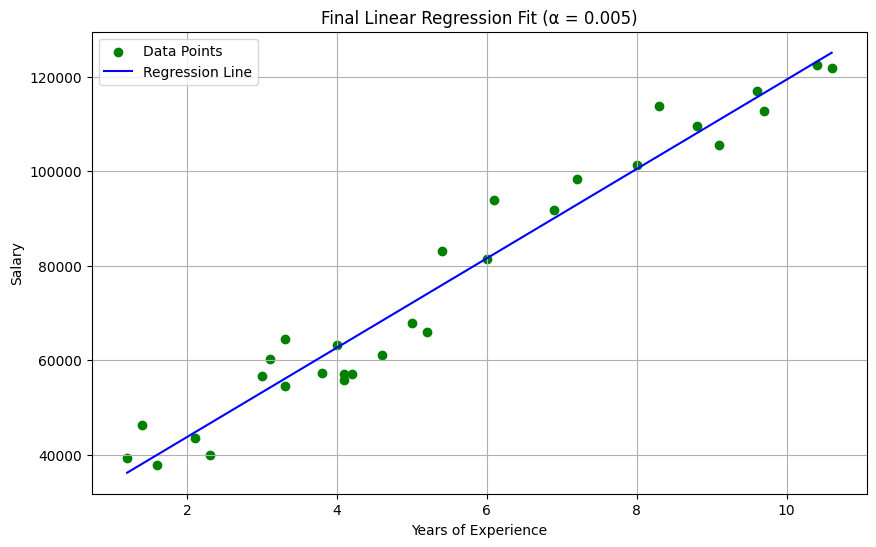

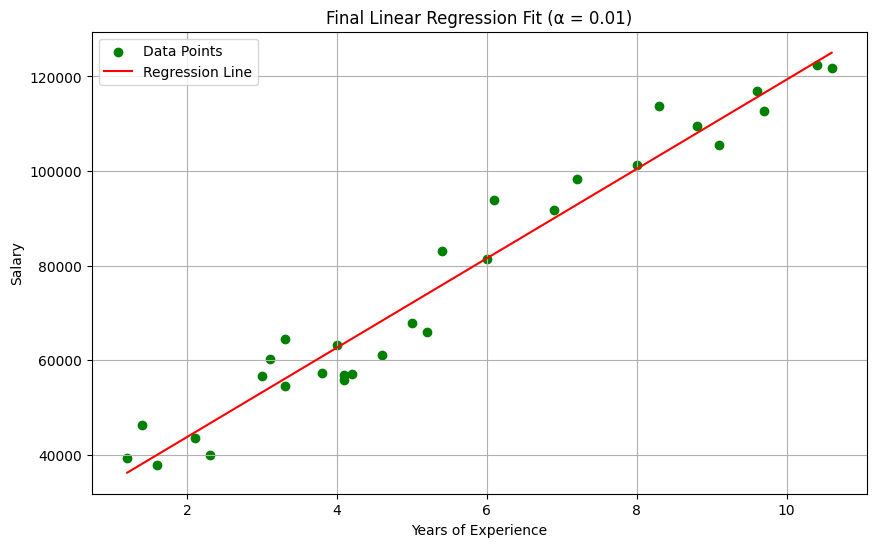

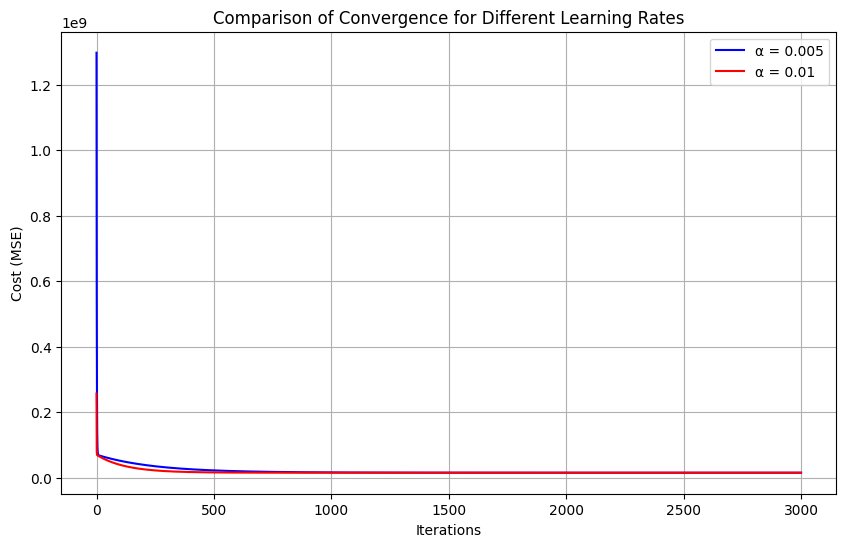

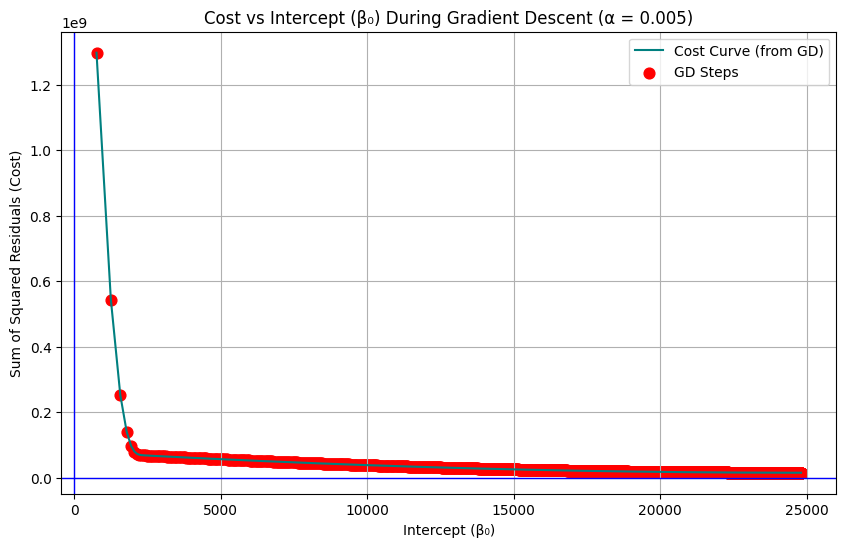

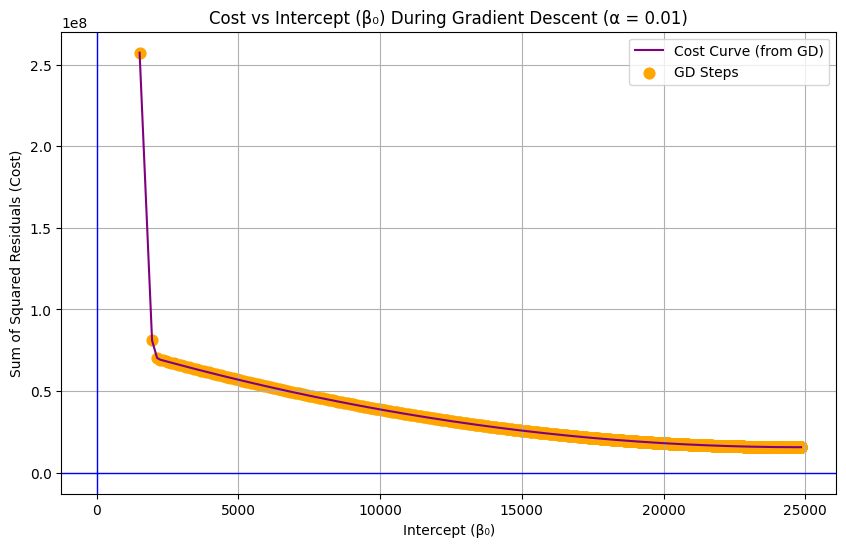


Final Parameters for Each Alpha:
α = 0.005: β₀ = 24800.24, β₁ = 9457.00, Cost = 15635717.32
α = 0.01: β₀ = 24848.11, β₁ = 9449.98, Cost = 15635475.86


In [50]:
# Different learning rates to compare
alphas = [0.005, 0.01]
results_by_alpha = {}

# Run gradient descent for each alpha
for alpha in alphas:
    result = gradient_descent(
        X, y, alpha, max_iterations=3000
    )
    results_by_alpha[alpha] = {
        'beta_1': result['beta_1'],
        'beta_0': result['beta_0'],
        'iterations': result['iterations'],
        'time_taken': result['time_taken'],
        'cost_history': result['cost_history'],
        'beta_1_history': result['beta_1_history'],
        'beta_0_history': result['beta_0_history']
    }
# Plot final regression fits for each alpha
for alpha, result in results_by_alpha.items():
    plot_regression_fit(
        X=X, y=y,
        beta_0=result['beta_0'],
        beta_1=result['beta_1'],
        title=f"Final Linear Regression Fit (α = {alpha})",
        xlabel="Years of Experience",
        ylabel="Salary",
        line_color='blue' if alpha == 0.005 else 'red'
    )

# Plot convergence of different rates
plot_multiple_cost_histories(
    cost_histories=[result['cost_history'] for result in results_by_alpha.values()],
    labels=[f"α = {alpha}" for alpha in alphas],
    title="Comparison of Convergence for Different Learning Rates",
    xlabel="Iterations",
    ylabel="Cost (MSE)",
    colors=['blue', 'red']
)

# Plot Cost vs Intercept (β₀) for each alpha
for alpha, result in results_by_alpha.items():
    plot_cost_vs_intercept(
        beta_0_history=result['beta_0_history'],
        cost_history=result['cost_history'],
        title=f"Cost vs Intercept (β₀) During Gradient Descent (α = {alpha})",
        curve_color='teal' if alpha == 0.005 else 'purple',
        scatter_color='red' if alpha == 0.005 else 'orange'
    )

# Print final values for reference
print("\nFinal Parameters for Each Alpha:")
for alpha, result in results_by_alpha.items():
    print(f"α = {alpha}: β₀ = {result['beta_0_history'][-1]:.2f}, β₁ = {result['beta_1_history'][-1]:.2f}, Cost = {result['cost_history'][-1]:.2f}")

**2. Data Preprocessing (Original vs Normalized vs Standardized)**

***Raw data sometimes has large values, which can confuse gradient descent and slow it down.***

🔹 Normalization scales data between 0 and 1

🔹 Standardization makes data have mean = 0 and std = 1

***Effect:***

🔹 Convergence is faster and more stable on normalized/standardized data.

🔹 Cost curves are smoother for preprocessed data.

🔹 Raw data took longer to converge (more iterations and time).


**3. Initial Values for Slope and Intercept**

Starting with slope = 0 and intercept = 0 might not be close to the best line.

🔹 Depends upon the complexity of data. Best guess converges fast.

🔹 The plotted initial guess line, didn’t match the data well every times (in most cases). That’s okay GD will improve it, but it affects how long convergence takes.



**Direction of Update (Positive vs Negative Adjustment)**

Normally, gradient descent subtracts the gradient to move downhill and reduce cost.

📌 I also tested positive updates but it not goes to my fit. But in some cases it might be the best option to go with so try with every possibility.

***Subplot and evolution plots show:***

🔹 With +α, the cost increased and parameters shot off to large values.

🔹 With −α, the line gradually improved and converged to a good fit.

***Direction Matters!***




**4. Tolerance (Stopping Condition)**

Tolerance defines when to stop. If the change in cost is very small.

***Tolerance is:***

🔹 Too tight → longer time, very precise.

🔹 Too loose → stops early, may not be optimal.